# Introduction to KNN Algorithm

- `Type` : Supervised Learning Algorithm
- `Concept` : KNN makes predictions based on the similarity between data points. It classifies a new point by looking at the K closest training points (neighbours) in the feature space


### `Working` :
1. Chooses the value for K / find the nearest neighbour
2. calculates the distance(e.g Euclidean, Manhattan, Minkowski) between the query/data point and all training data points.
3. Selects the K nearest points / neighbours.
4. For Classification :- majority vote among neighbours decides the class
5. For Regression :- average(or weighted average) of neighbours values is taken.

### `Points to be noted` :
- KNN is also known as `Lazy Learner`.
- KNN has very high time and space complexity.
- Best alternative for KNN is AAN.
- Training phase --> very less time, high space complexity.

# Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import The Dataset

In [5]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

# Exploratory Data Analysis(EDA)

In [7]:
# Checking for null values
df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

### Observation 
- Each and every feature has 0 null values

In [9]:
# Checking for Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

### Observation 
- There are 7 float , 6 int and 2 object data types

In [11]:
# Descriptive Statistics
df.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

<Axes: xlabel='Calories_Burned', ylabel='Count'>

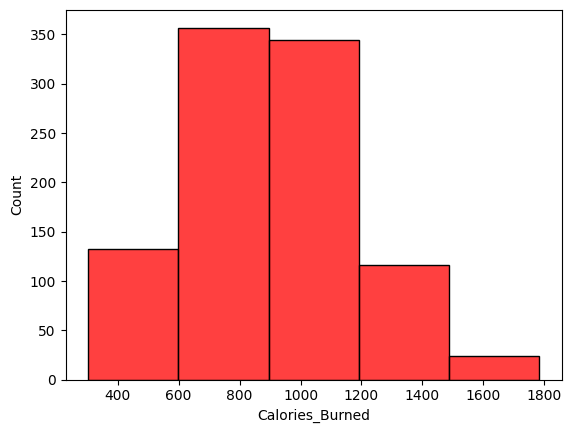

In [12]:
## Plotting class distribution for target variable 
sns.histplot(df['Calories_Burned'] , bins = 5 , color = 'red')

### Observation 
- People who burn between 600 and 1200 calories record the highest calorie expenditure.
- Individuals burning between 400–600 calories and those in the 1200–1500 calorie range both have a count of around 120, placing them in a similar range.
- And 1500-1750 around calories has the lowest range.

# Data Visualization 

### Univariate Analysis 

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Numerical Features

#### Distribution of data

Age                                 Axes(0.125,0.786098;0.168478x0.0939024)
Weight (kg)                      Axes(0.327174,0.786098;0.168478x0.0939024)
Height (m)                       Axes(0.529348,0.786098;0.168478x0.0939024)
Max_BPM                          Axes(0.731522,0.786098;0.168478x0.0939024)
Avg_BPM                             Axes(0.125,0.673415;0.168478x0.0939024)
Resting_BPM                      Axes(0.327174,0.673415;0.168478x0.0939024)
Session_Duration (hours)         Axes(0.529348,0.673415;0.168478x0.0939024)
Calories_Burned                  Axes(0.731522,0.673415;0.168478x0.0939024)
Fat_Percentage                      Axes(0.125,0.560732;0.168478x0.0939024)
Water_Intake (liters)            Axes(0.327174,0.560732;0.168478x0.0939024)
Workout_Frequency (days/week)    Axes(0.529348,0.560732;0.168478x0.0939024)
Experience_Level                 Axes(0.731522,0.560732;0.168478x0.0939024)
BMI                                 Axes(0.125,0.448049;0.168478x0.0939024)
dtype: objec

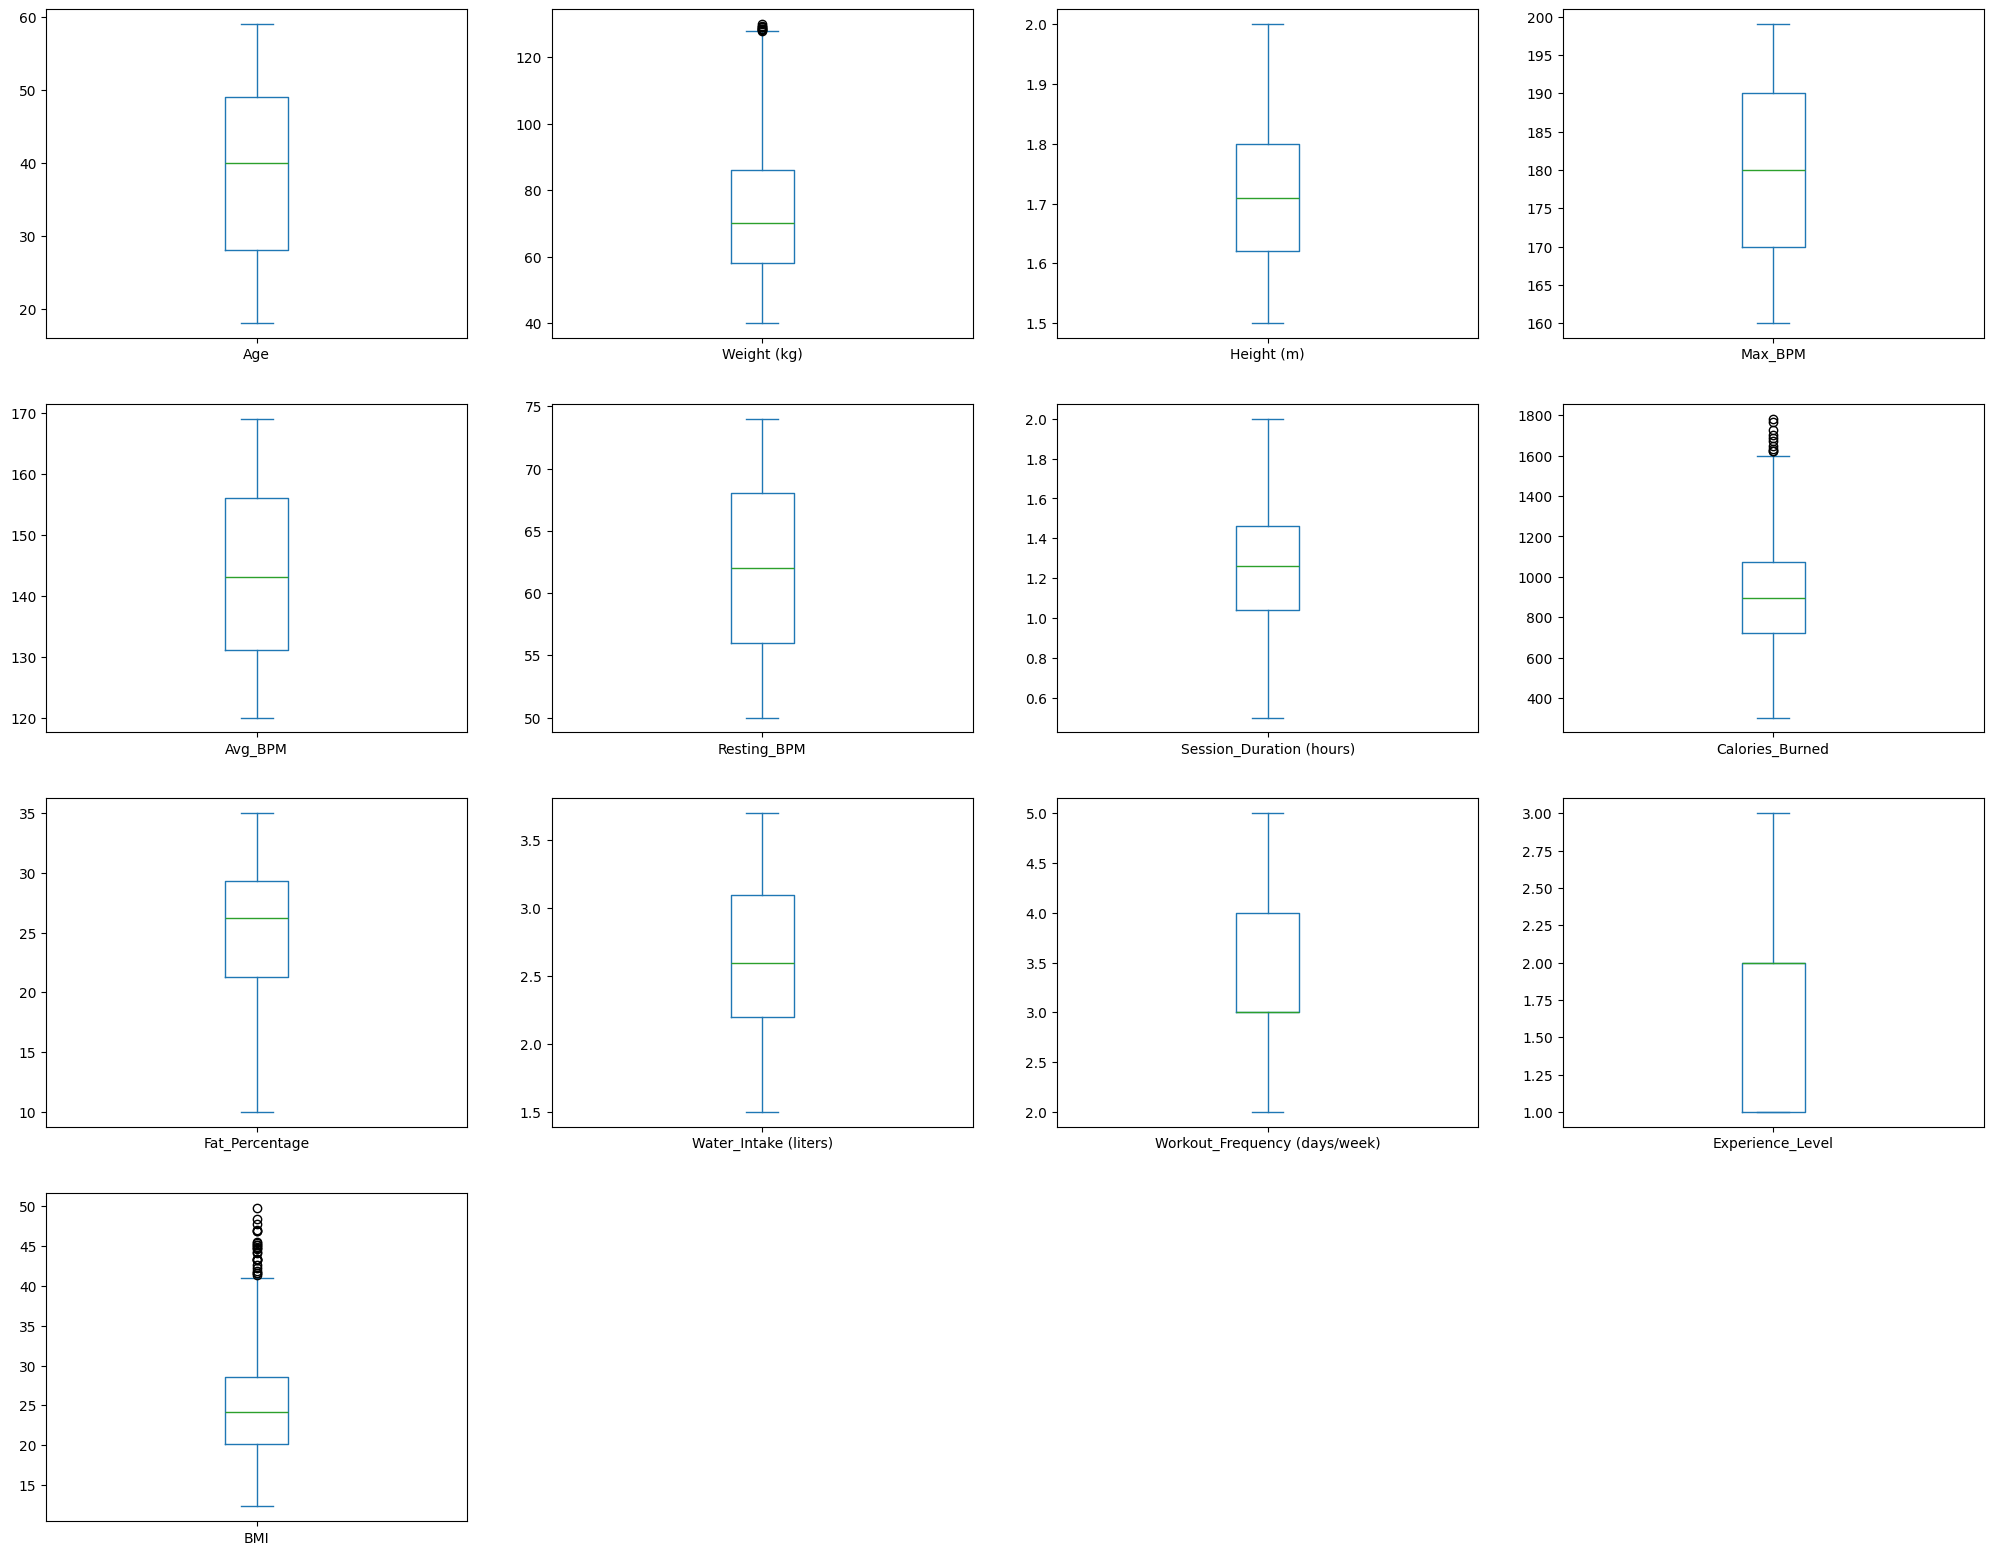

In [19]:
df.plot(kind = 'box' , 
        subplots = True , 
        figsize = (25 , 35) , 
        layout = (7 , 4))

#### Splitting data numerical and categorical 

In [21]:
num_df = df.select_dtypes(include = [int , float]).columns
cat_df = df.select_dtypes(include = object).columns

In [22]:
num_df

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI'],
      dtype='object')

In [23]:
age = num_df[0]
weight = num_df[1]
height = num_df[2]
max_bpm = num_df[3]
avg_bpm = num_df[4]
resting_bpm = num_df[5]
session_duration = num_df[6]
calories_burned = num_df[7]
fat_percentage = num_df[8]
water_intake = num_df[9]
workout_frequency = num_df[10]
experience_level = num_df[11]
bmi = num_df[12]

#### `age`

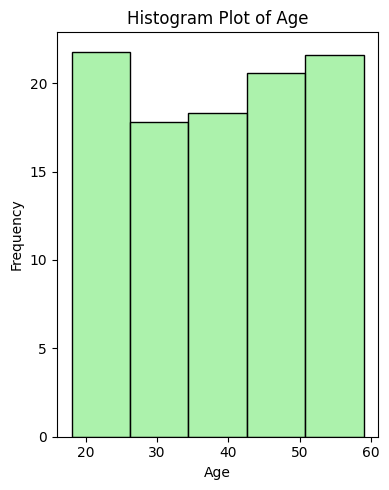

In [25]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = df[age] , bins = 5 , color = 'lightgreen' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {age}')
plt.tight_layout()

### Observation 
- The highest age frequency falls within the ranges of 20–27 and 52–57.
- The ages between 28–51 show a relatively similar frequency, with the 43–51 range being slightly higher.

#### `weight`

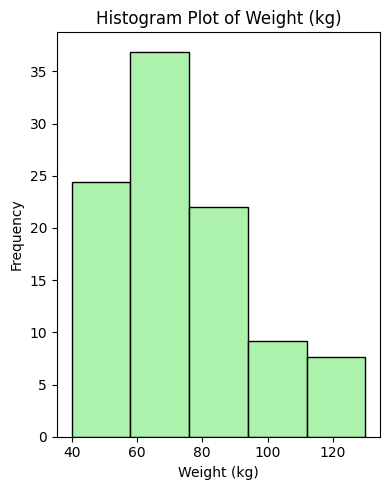

In [28]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = df[weight] , bins = 5 , color = 'lightgreen' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {weight}')
plt.tight_layout()

### Observation 
- The weight range of 59–78 has the highest frequency.
- The ranges 40–58 and 79–98 show a similar frequency, around 20–25.
- The ranges 99–115 and 116–125 record the lowest frequency, around 5–10, and are nearly identical.

#### `height`

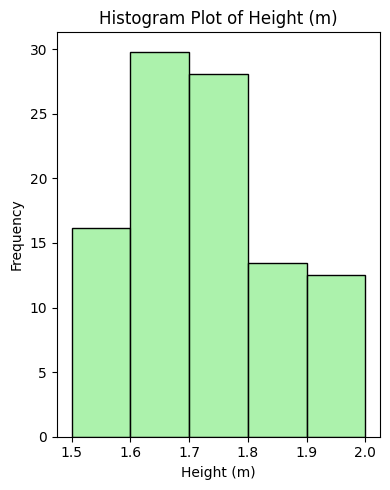

In [31]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = df[height] , bins = 5 , color = 'lightgreen' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {height}')
plt.tight_layout()

### Observation 
- Most individuals fall between 1.6 m and 1.8 m in height, with fewer at the extremes.

#### `max_bpm`

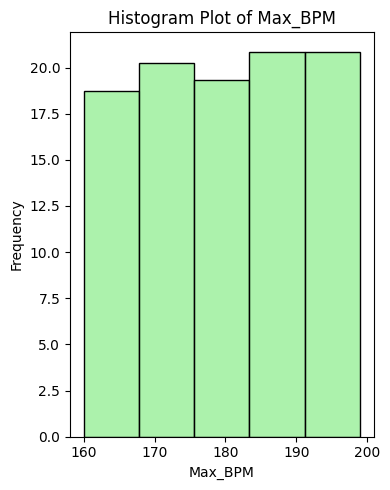

In [33]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = df[max_bpm] , bins = 5 , color = 'lightgreen' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {max_bpm}')
plt.tight_layout()

### Observation 
- All BPM values fall within a similar frequency range of 17.5 to 20 but 183 to 198 range has the highest.

#### `avg_bpm`

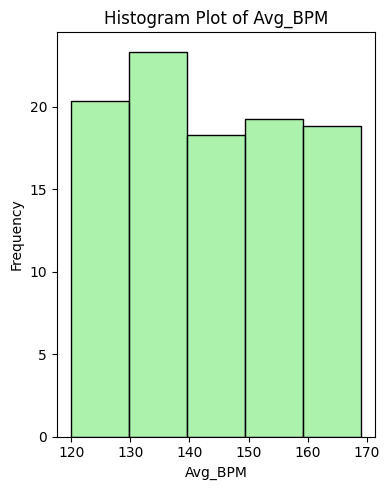

In [36]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = df[avg_bpm] , bins = 5 , color = 'lightgreen' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {avg_bpm}')
plt.tight_layout()

### Observation
- The range 120–139 has a frequency above 20, with 129–139 being slightly higher.
- All other ranges fall within a similar frequency range of 15–20.

#### `resting_bpm`

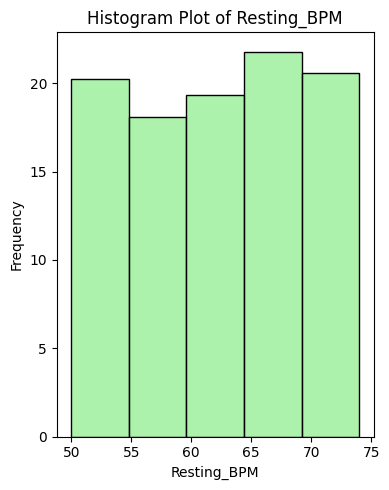

In [39]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = df[resting_bpm] , bins = 5 , color = 'lightgreen' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {resting_bpm}')
plt.tight_layout()

### Observation
- All resting BPM values have a similar frequency above 20, except for the 54–59 range, which falls between 15 and 20.

#### `session_duration`

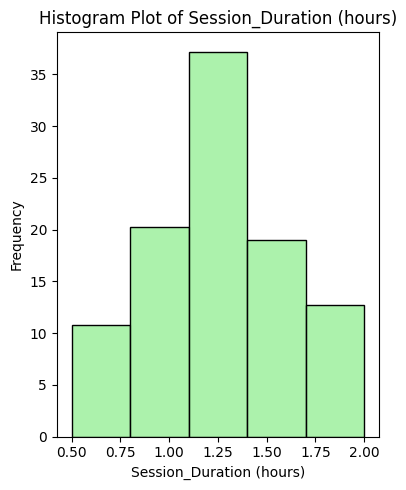

In [42]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = df[session_duration] , bins = 5 , color = 'lightgreen' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {session_duration}')
plt.tight_layout()

### Observation 
- The session duration is mostly concentrated around 1.0 to 1.5 hours, with the highest frequency (around 37–38 sessions) occurring between 1.0 and 1.25 hours.
- Shorter sessions (0.5–0.75 hours) and longer sessions (1.75–2.0 hours) are relatively less frequent, both under 15.
- The distribution shows a peak in the middle range (1.0–1.25 hours), suggesting that most users typically spend about an hour to an hour and a half per session.

#### `calories_burned`

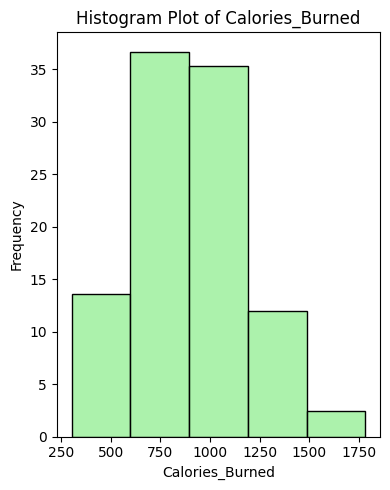

In [45]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = df[calories_burned] , bins = 5 , color = 'lightgreen' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {calories_burned}')
plt.tight_layout()

### Observation
- The majority of sessions fall between 600 to 1200 calories burned, with frequencies peaking around 750–1000 calories (35–37 sessions).
- The 400–600 calorie and 1200–1500 calorie ranges both have similar counts of around 12–13 sessions.
- Very low (<400) and very high (>1500) calorie burns are rare, with only a few occurrences.
- Overall, the distribution is centered around moderate calorie burns (600–1200), indicating that most participants burn calories in this middle range.

#### `fat_percentage`

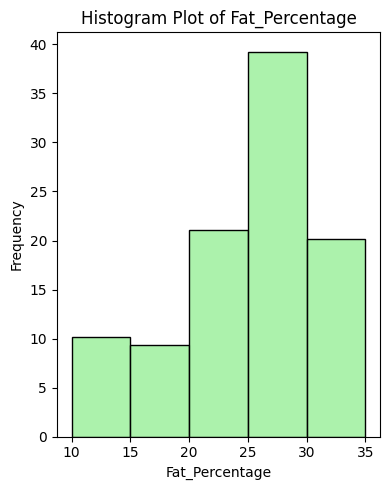

In [48]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = df[fat_percentage] , bins = 5 , color = 'lightgreen' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {fat_percentage}')
plt.tight_layout()

### Observation 
- The highest frequency is in the 25–30% fat percentage range, with nearly 40 individuals falling in this category.
- The 20–25% and 30–35% ranges have moderate frequencies (around 20–22 each).
- Lower fat percentages 10–15% and 15–20% are much less common, with fewer than 10–11 individuals each.
- Overall, the distribution shows that most individuals fall within 20–35% fat percentage, peaking around 25–30%.

#### `water_intake`

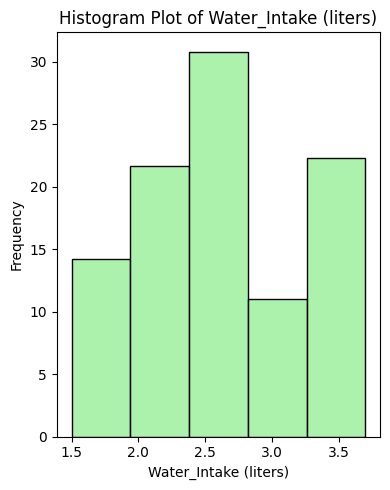

In [51]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = df[water_intake] , bins = 5 , color = 'lightgreen' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {water_intake}')
plt.tight_layout()

### Observation 
- The highest frequency is between 2.5–3.0 liters, with around 31 individuals.
- The 2.0–2.5 liters and 3.5–4.0 liters ranges follow closely, both with frequencies above 20.
- The lowest intake frequency is between 3.0–3.5 liters, with only about 11 individuals.
- Very low intake (1.5–2.0 liters) is also relatively uncommon, with fewer than 15 individuals.
- Overall, the distribution suggests that most individuals consume between 2.0 and 3.5 liters daily, with 2.5–3.0 liters being the most typical intake.

#### `workout_frequency`

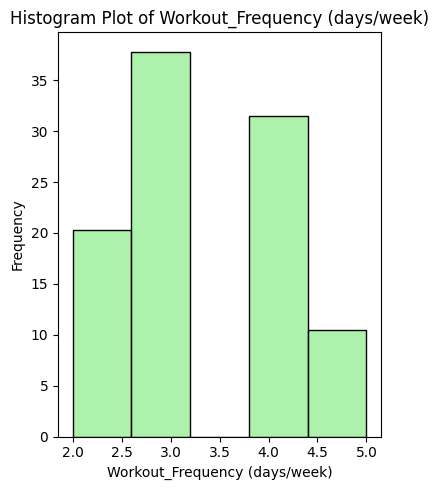

In [54]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = df[workout_frequency] , bins = 5 , color = 'lightgreen' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {workout_frequency}')
plt.tight_layout()

### Observation 
- The most common workout frequency is 3 days per week, with the highest count (about 38 individuals).
- The second most frequent group works out 4 days per week, with around 32 individuals.
- 2 days per week has moderate participation (~20 individuals).
- The least common frequency is 5 days per week, with only about 10–11 individuals.
- Overall, the trend shows that most people prefer working out 3–4 days per week, while very few commit to daily or very frequent workouts.

#### `experience_level`

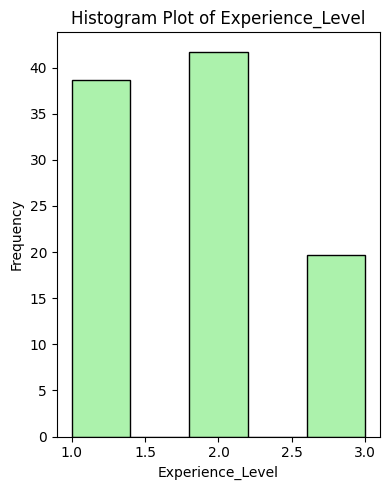

In [57]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = df[experience_level] , bins = 5 , color = 'lightgreen' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {experience_level}')
plt.tight_layout()

### Observation 
- The highest frequency is at level 2 (intermediate), with about 42 individuals.
- Level 1 (beginner) also has a high count, close to 39 individuals, making it almost as common as intermediate.
- The least frequent group is level 3 (advanced), with around 20 individuals.
- Overall, the majority of individuals are beginners or intermediates, while fewer have reached advanced levels of experience.

#### `bmi`

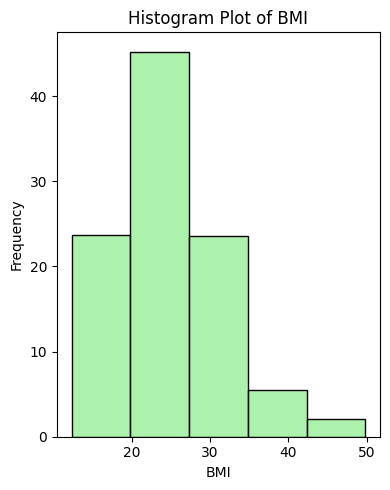

In [60]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = df[bmi] , bins = 5 , color = 'lightgreen' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {bmi}')
plt.tight_layout()

### Observation 
- The most common BMI range is 20–25, with the highest frequency (around 45 individuals).
- The 15–20 and 25–30 ranges also have moderate counts, each around 23–24 individuals.
- Higher BMI ranges (30–35 and above) are much less frequent, with fewer than 6 individuals beyond 35.
- Overall, the distribution shows that most individuals fall within the healthy BMI category (20–25), while relatively few are in the obese range (>30).

### Categorical Features

In [63]:
cat_df

Index(['Gender', 'Workout_Type'], dtype='object')

In [64]:
gender = cat_df[0]
workout_type = cat_df[1]

#### `gender`

Text(0, 0.5, '')

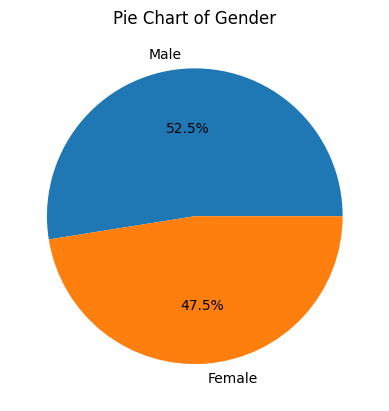

In [66]:
df[gender].value_counts().nlargest(10).plot.pie(autopct = '%1.1f%%' , color = sns.color_palette('Set2'))
plt.title(f'Pie Chart of {gender}')
plt.ylabel('')

### Observation 
- The dataset shows a slight male majority with 52.5% males.
- Females make up 47.5%, which is only a small difference from the male proportion.
- Overall, the gender distribution is fairly balanced, with both genders almost equally represented.

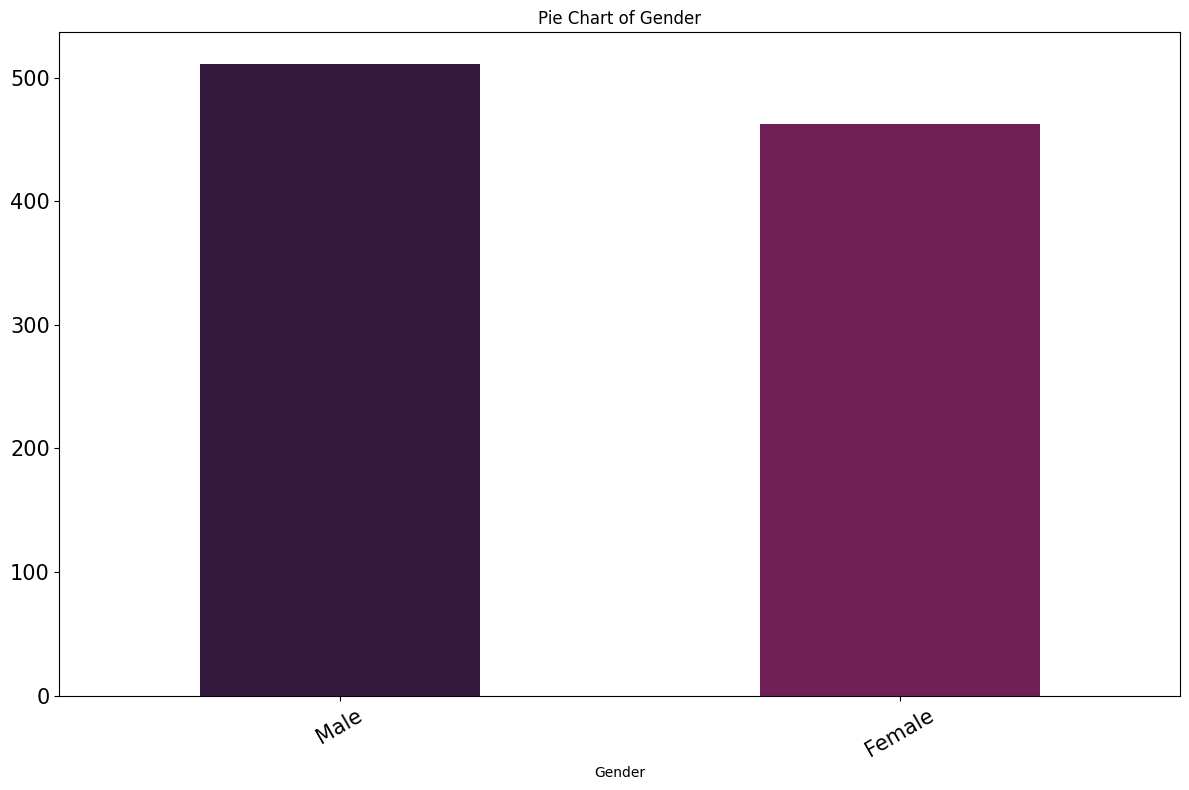

In [68]:
plt.figure(figsize = (12,8))
df[gender].value_counts().nlargest(8).plot.bar(color = sns.color_palette('rocket') , fontsize = 15)
plt.title(f'Pie Chart of {gender}')
plt.xticks(rotation = 30)
plt.tight_layout()

#### `Workout_Type`

Text(0, 0.5, '')

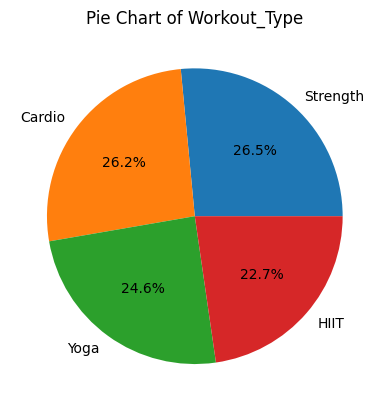

In [71]:
df[workout_type].value_counts().nlargest(10).plot.pie(autopct = '%1.1f%%' , color = sns.color_palette('Set2'))
plt.title(f'Pie Chart of {workout_type}')
plt.ylabel('')

### Observation 
- Strength training is the most common workout, accounting for 26.5%.
- Cardio follows very closely at 26.2%, showing nearly equal preference to strength.
- Yoga is chosen by 24.6%, highlighting a significant interest in mindful fitness.
- HIIT is the least common but still notable, at 22.7%.

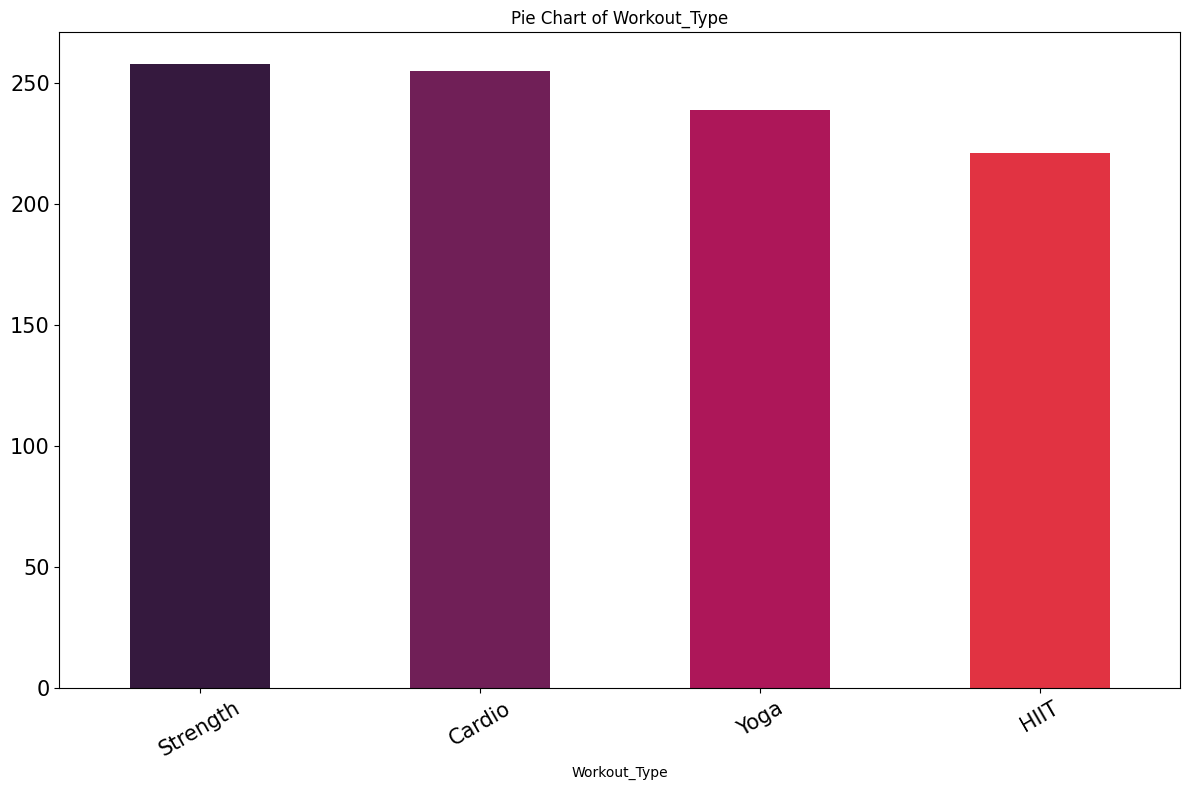

In [77]:
plt.figure(figsize = (12,8))
df[workout_type].value_counts().nlargest(8).plot.bar(color = sns.color_palette('rocket') , fontsize = 15)
plt.title(f'Pie Chart of {workout_type}')
plt.xticks(rotation = 30)
plt.tight_layout()

### Observation 
- Strength workouts are the most frequent, with slightly over 260 occurrences.
- Cardio follows very closely, just under Strength, showing a nearly equal preference.
- Yoga comes next, with around 240 occurrences, still very popular.
- HIIT is the least frequent, with around 220 occurrences, though it remains a significant portion.

# Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot ,violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps

### Numerical vs Categorical

In [83]:
print(num_df)
print(cat_df)

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI'],
      dtype='object')
Index(['Gender', 'Workout_Type'], dtype='object')


In [84]:
def catego_num(df , numerical_df , categorical_df):
    for num in numerical_df:
        plt.figure(figsize = (17,15))

        top10_categories = df[categorical_df].value_counts(ascending = False).index[:10]
        top10_df = df[df[categorical_df].isin(top10_categories)]
        #barplot
        plt.subplot(3,2,1)
        sns.barplot(data = top10_df , x = num , y = categorical_df , palette = 'rocket')
        plt.title(f'Bar Plot of {num} vs {categorical_df}')
        
        #KDE Plot
        plt.subplot(3,2,2)
        sns.kdeplot(data = top10_df , x = num , hue = categorical_df , fill = True)
        plt.title(f'KDE Plot of {num} vs {categorical_df}')

        #Scatter Plot
        plt.subplot(3,2,3)
        sns.scatterplot(data = top10_df , x = num , y = categorical_df , color = 'red')
        plt.title(f'Scatter Plot of {num} vs {categorical_df}')

        #Voilin Plot
        plt.subplot(3,2,4)
        sns.violinplot(data = top10_df , x = num , y = categorical_df)
        plt.title(f'Violin Plot of {num} vs {categorical_df}')

        
        
    
        plt.tight_layout()

#### `Gender VS Numerical Features`

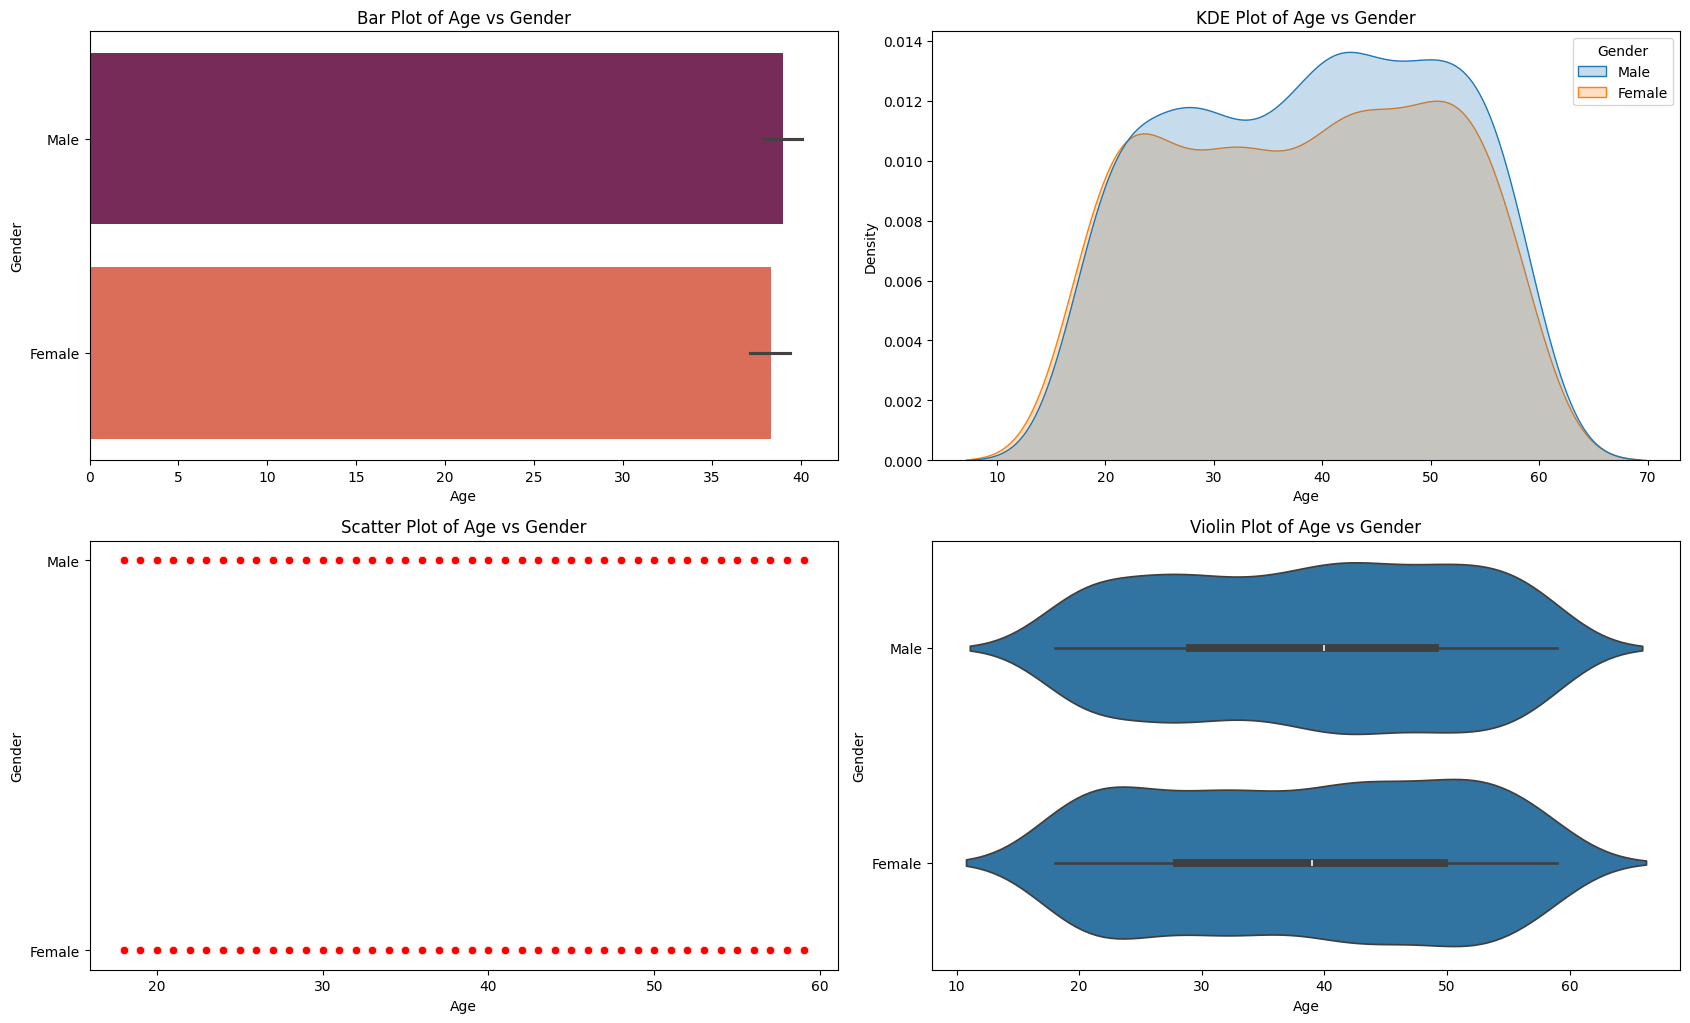

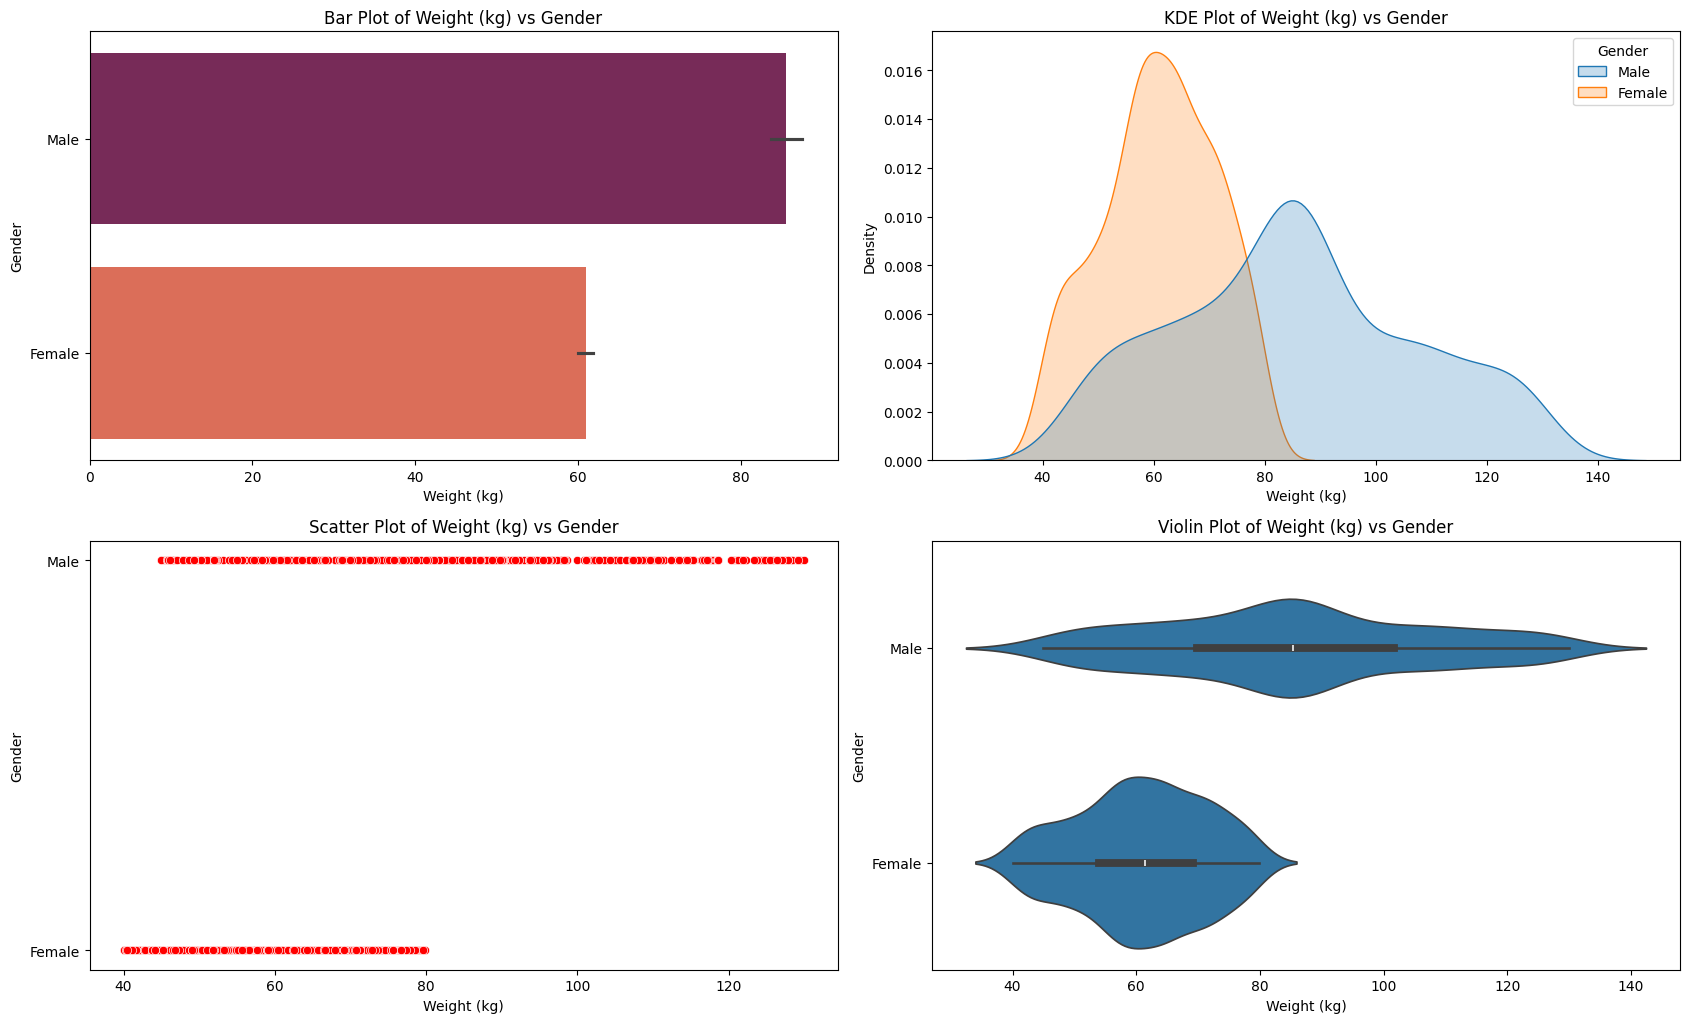

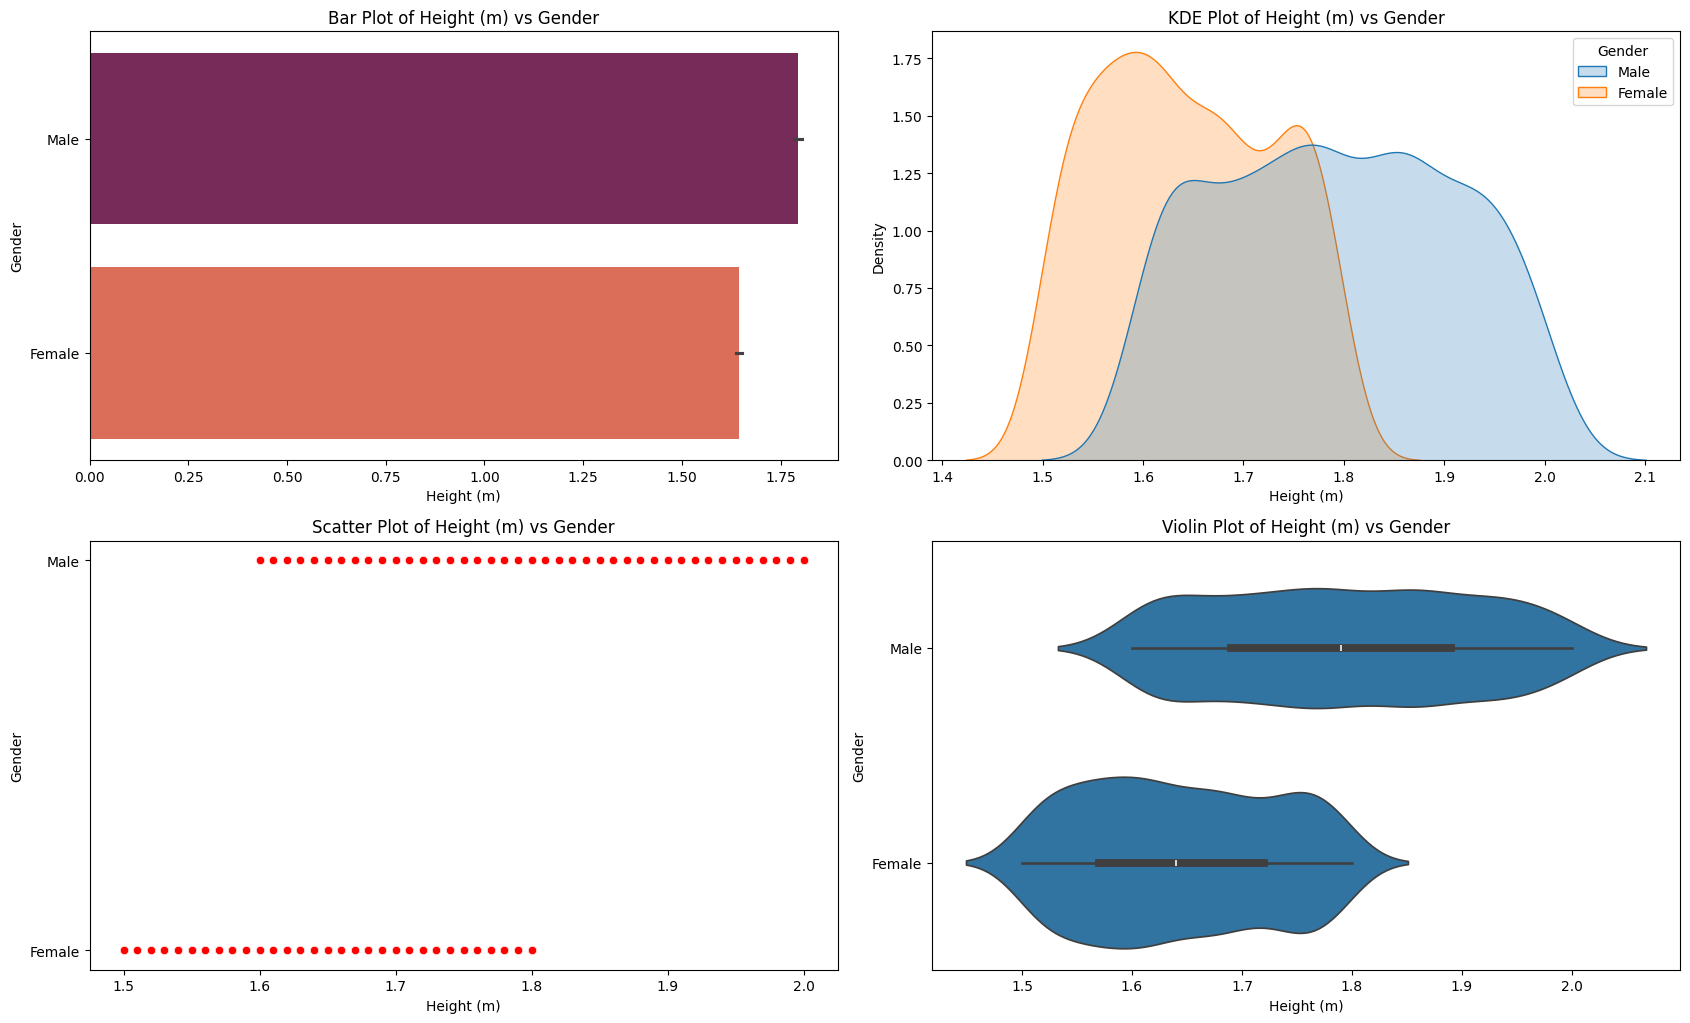

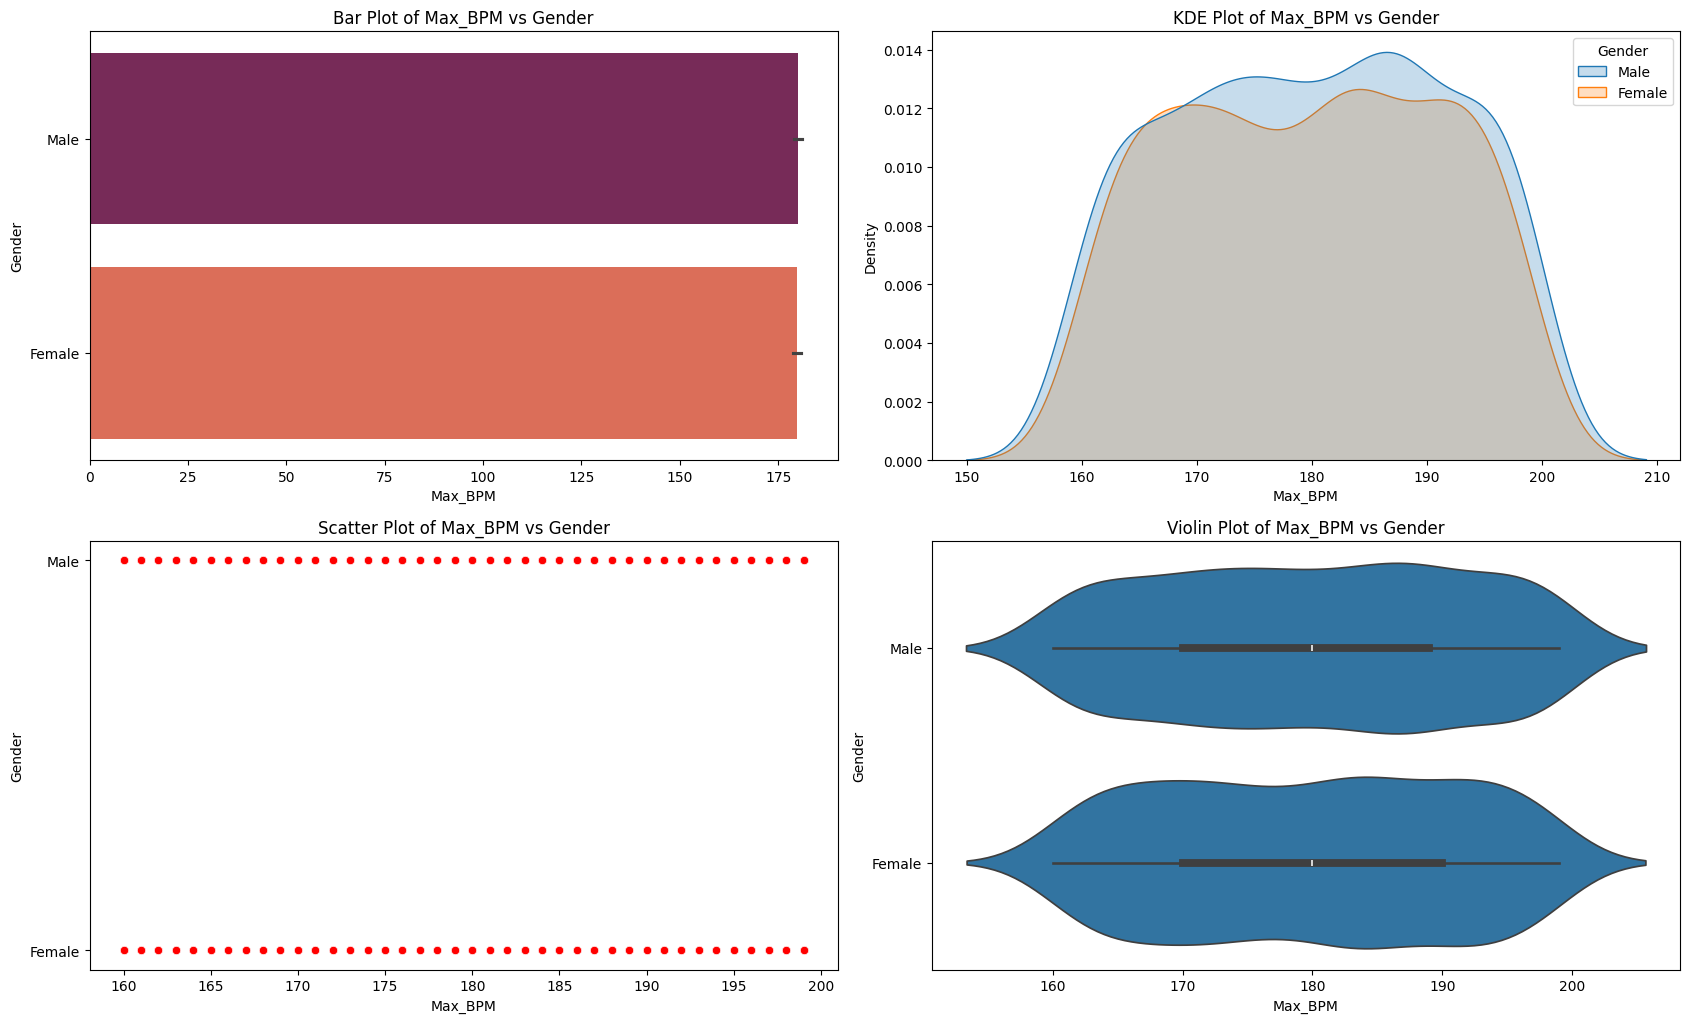

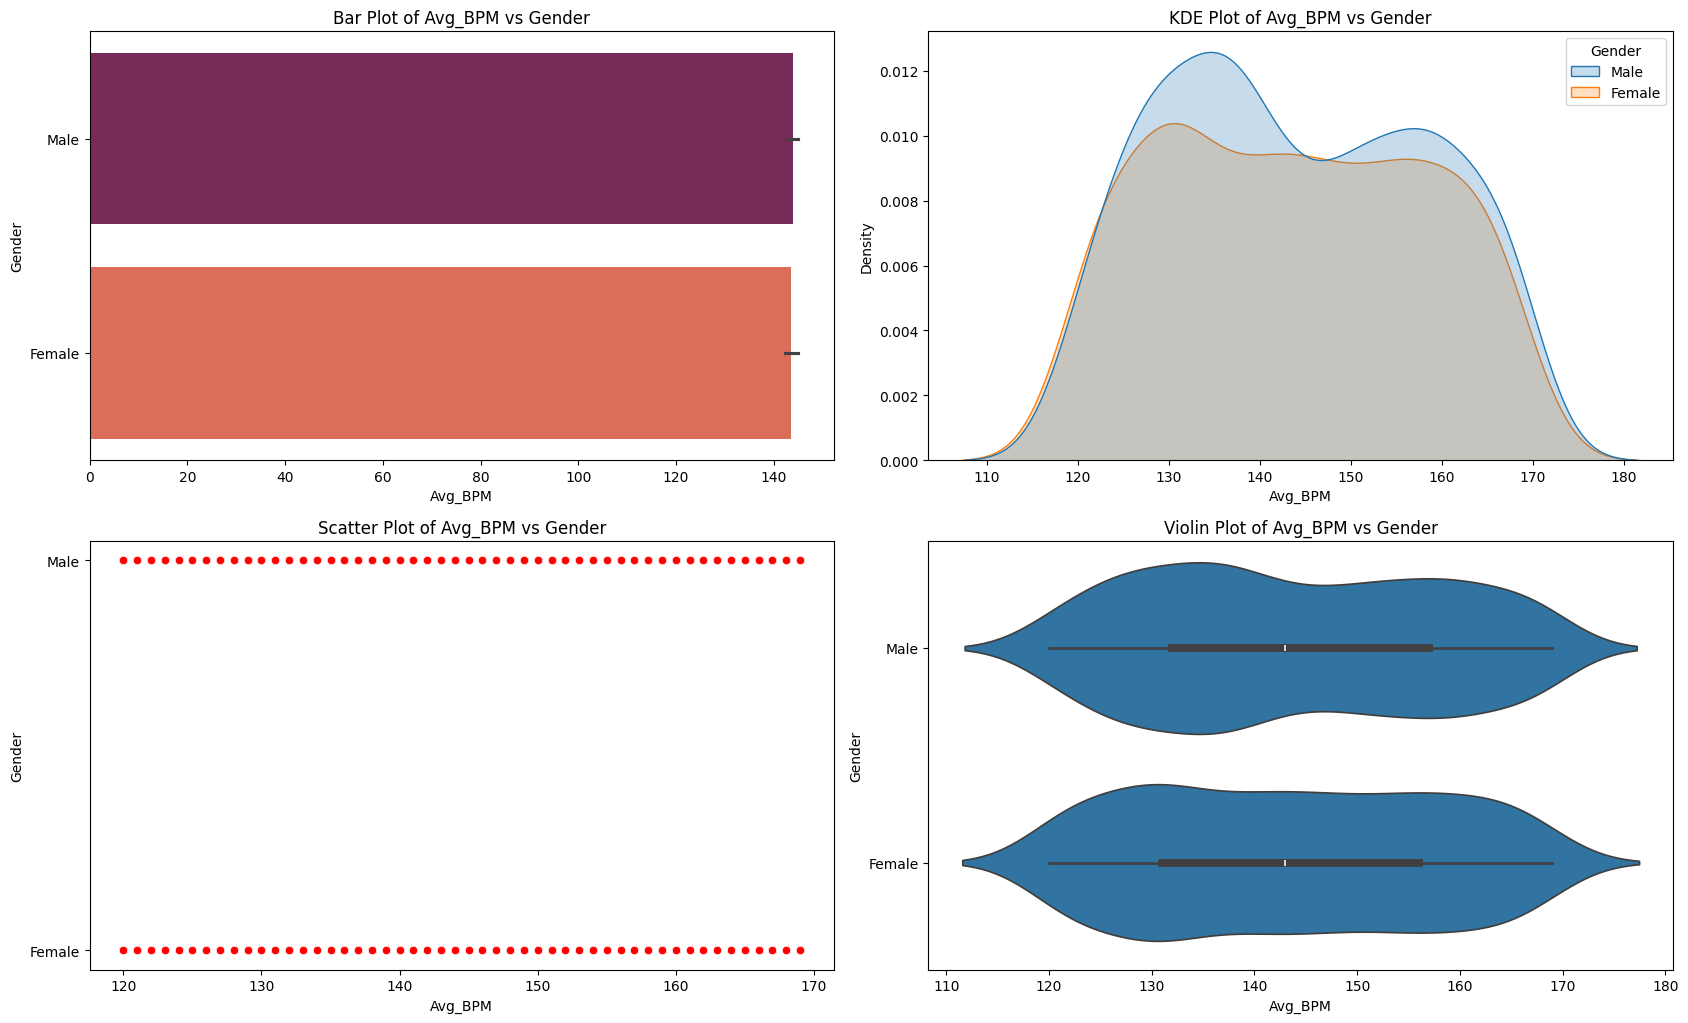

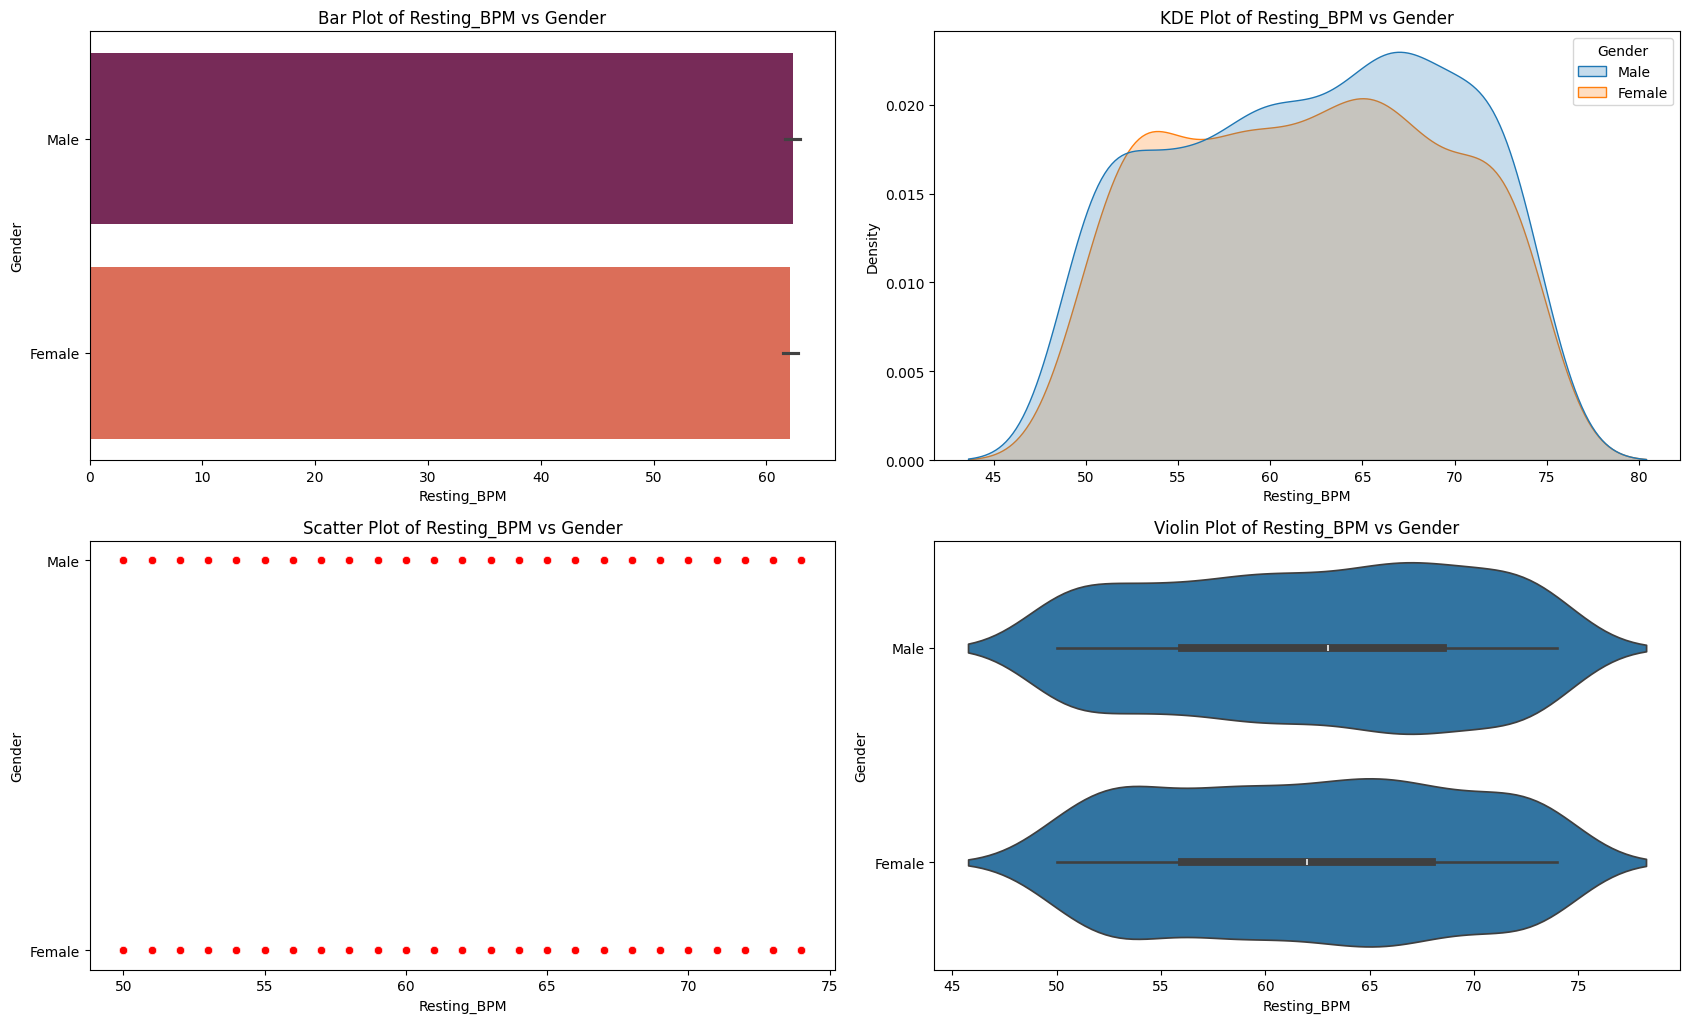

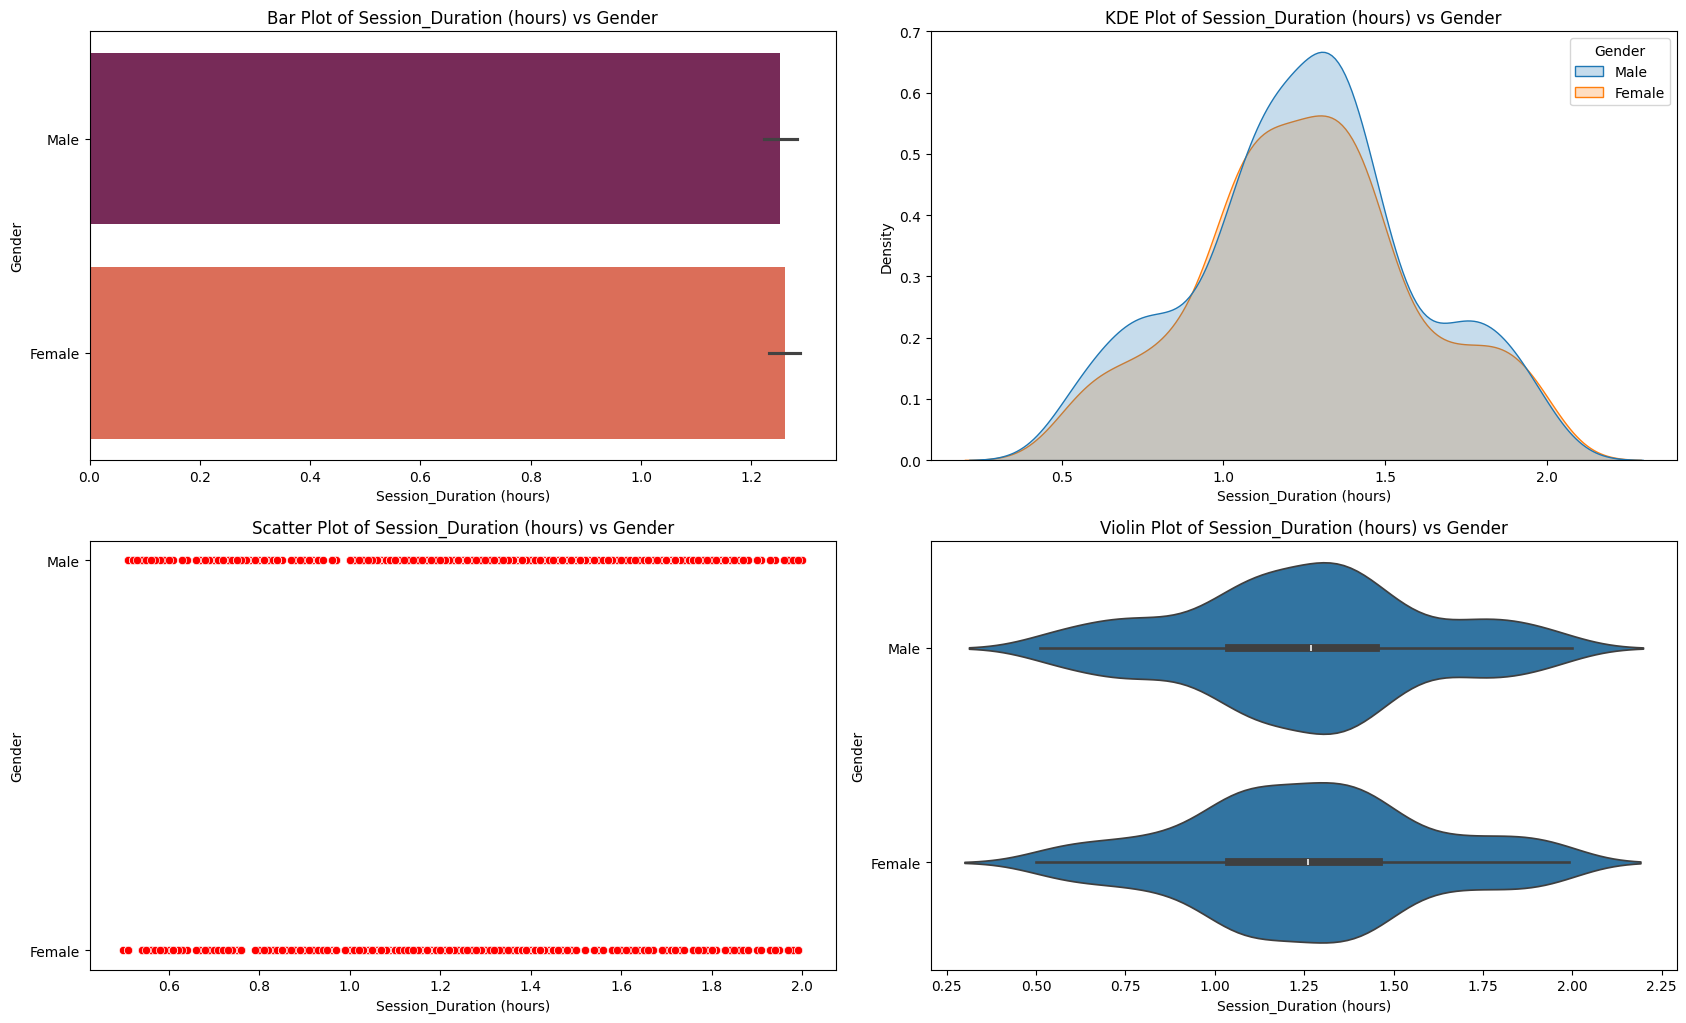

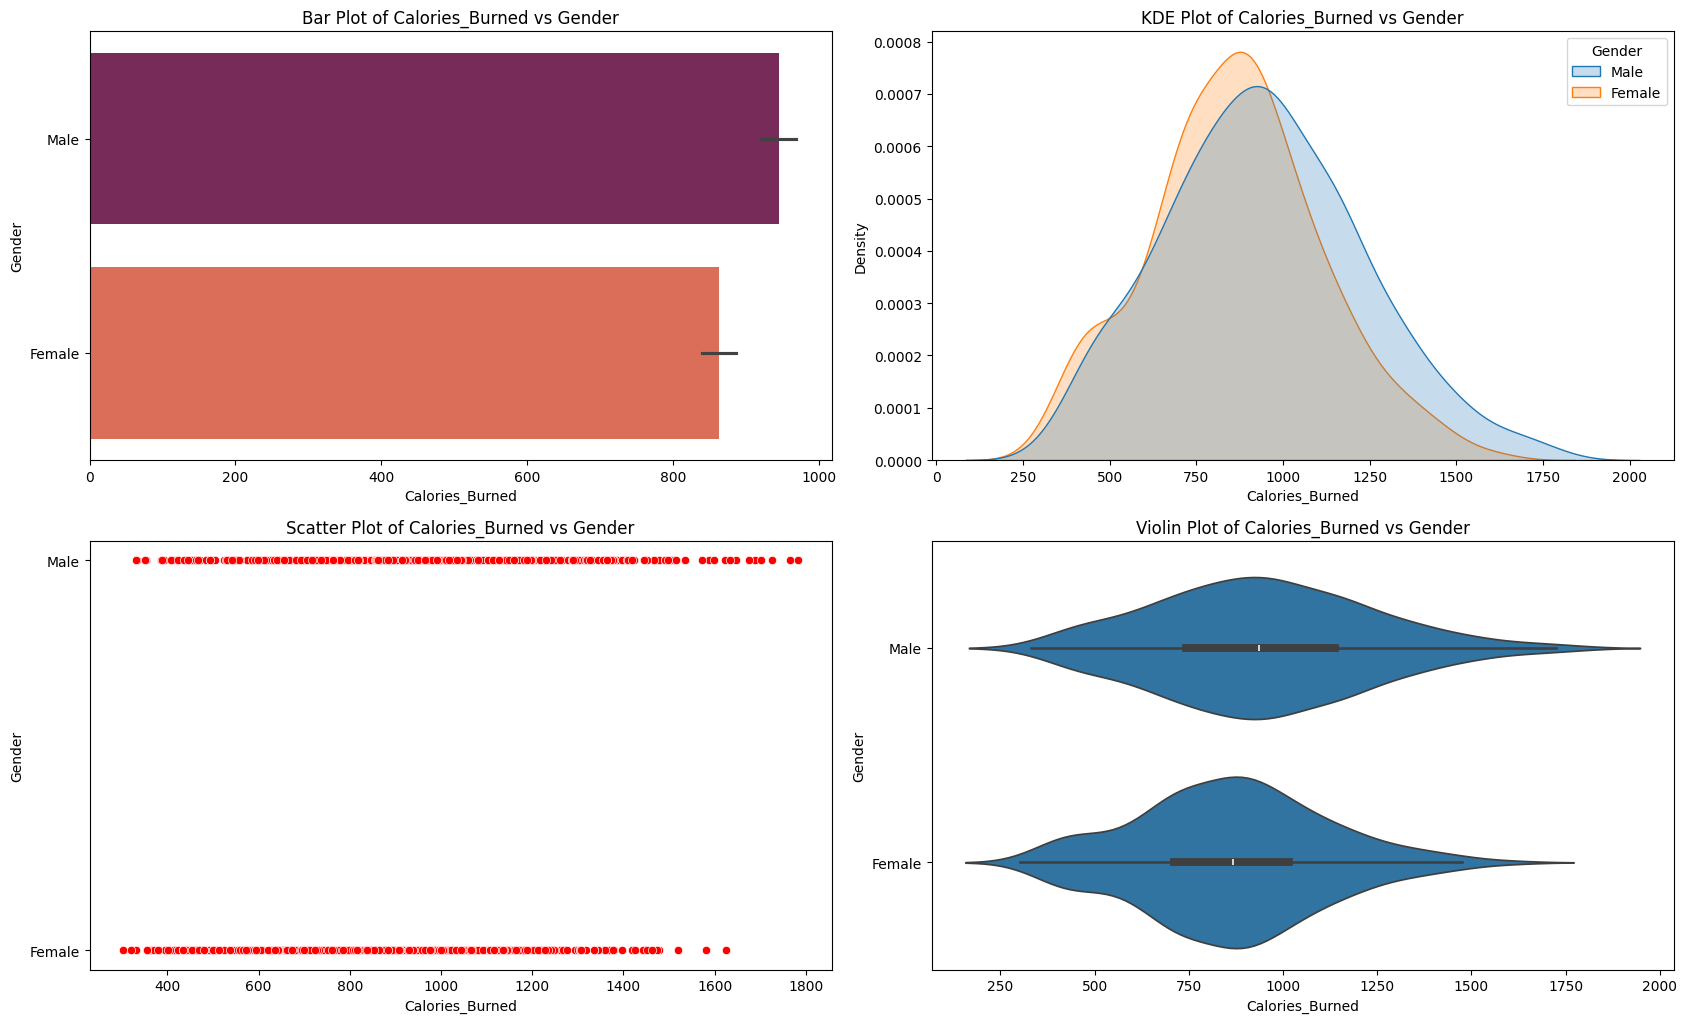

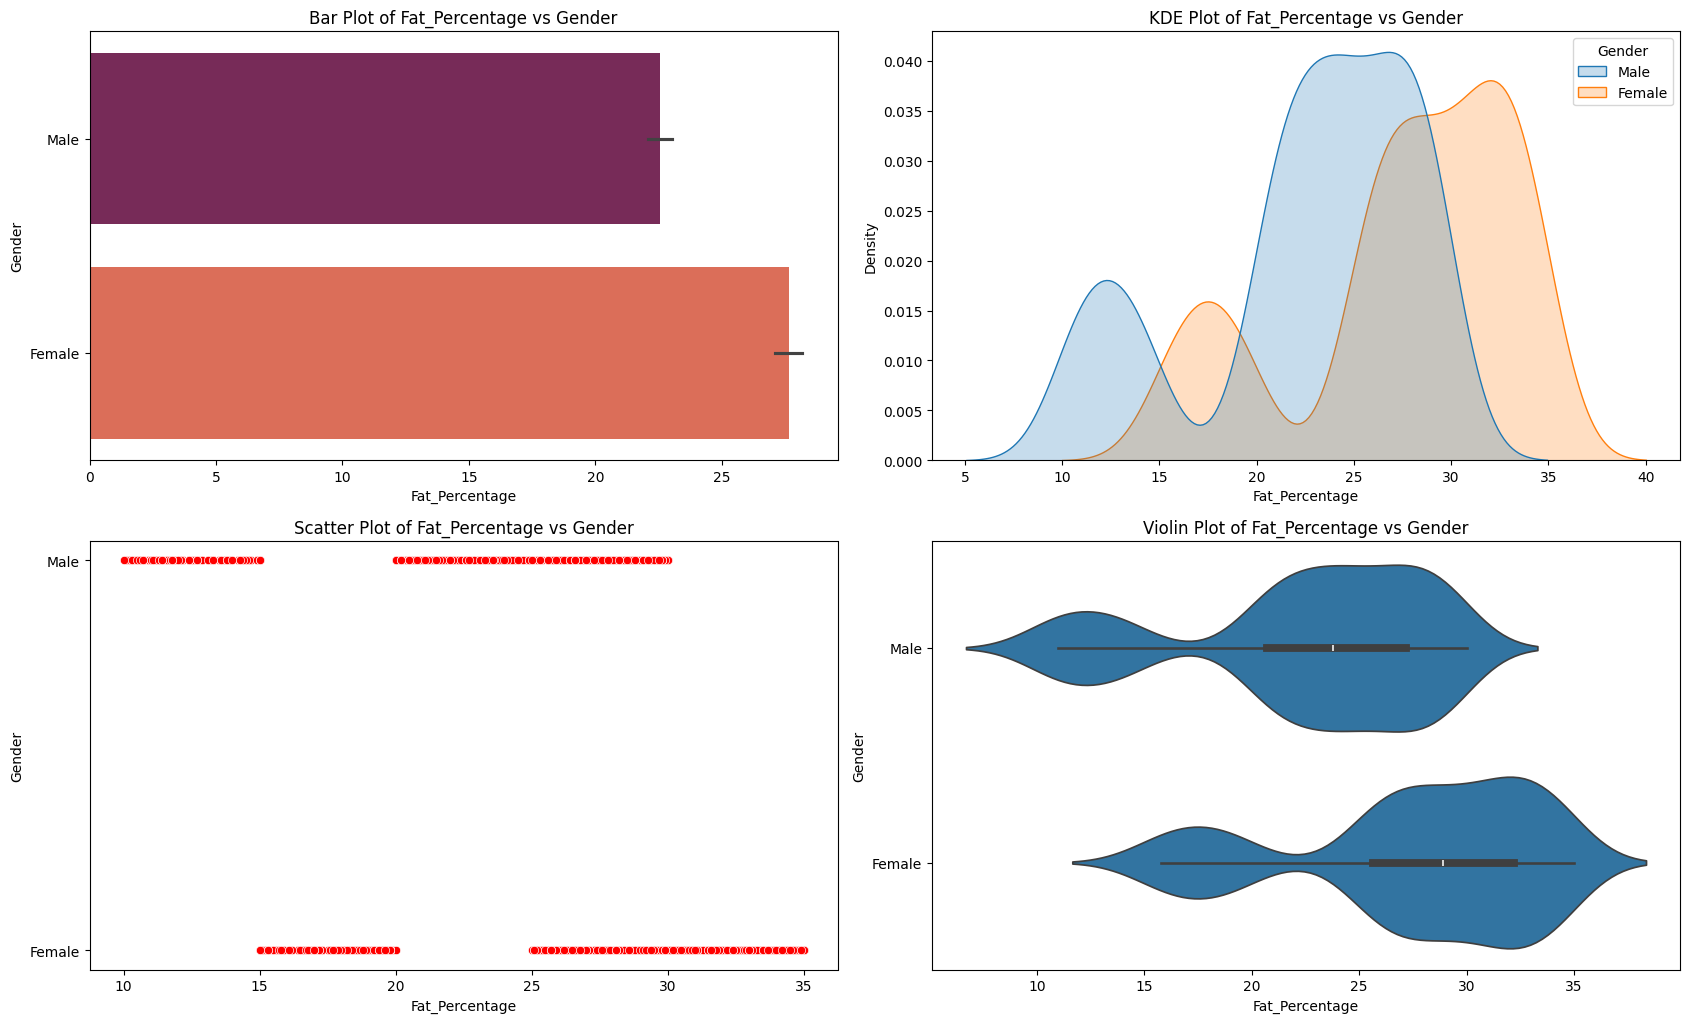

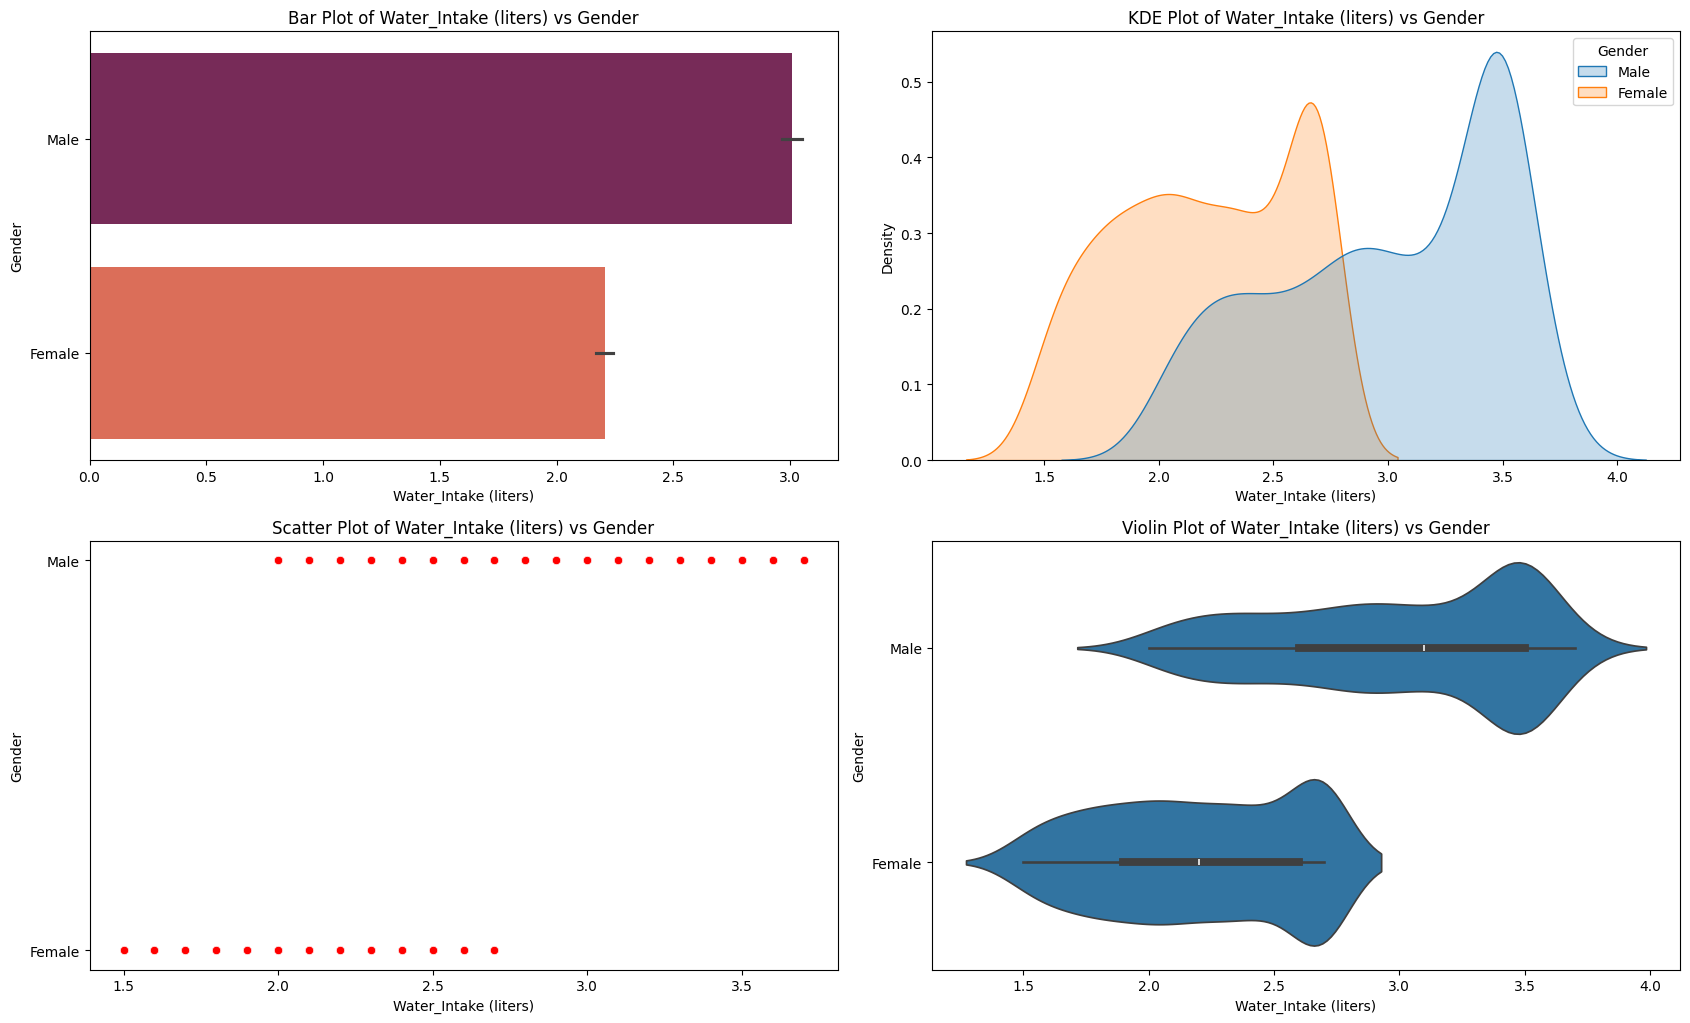

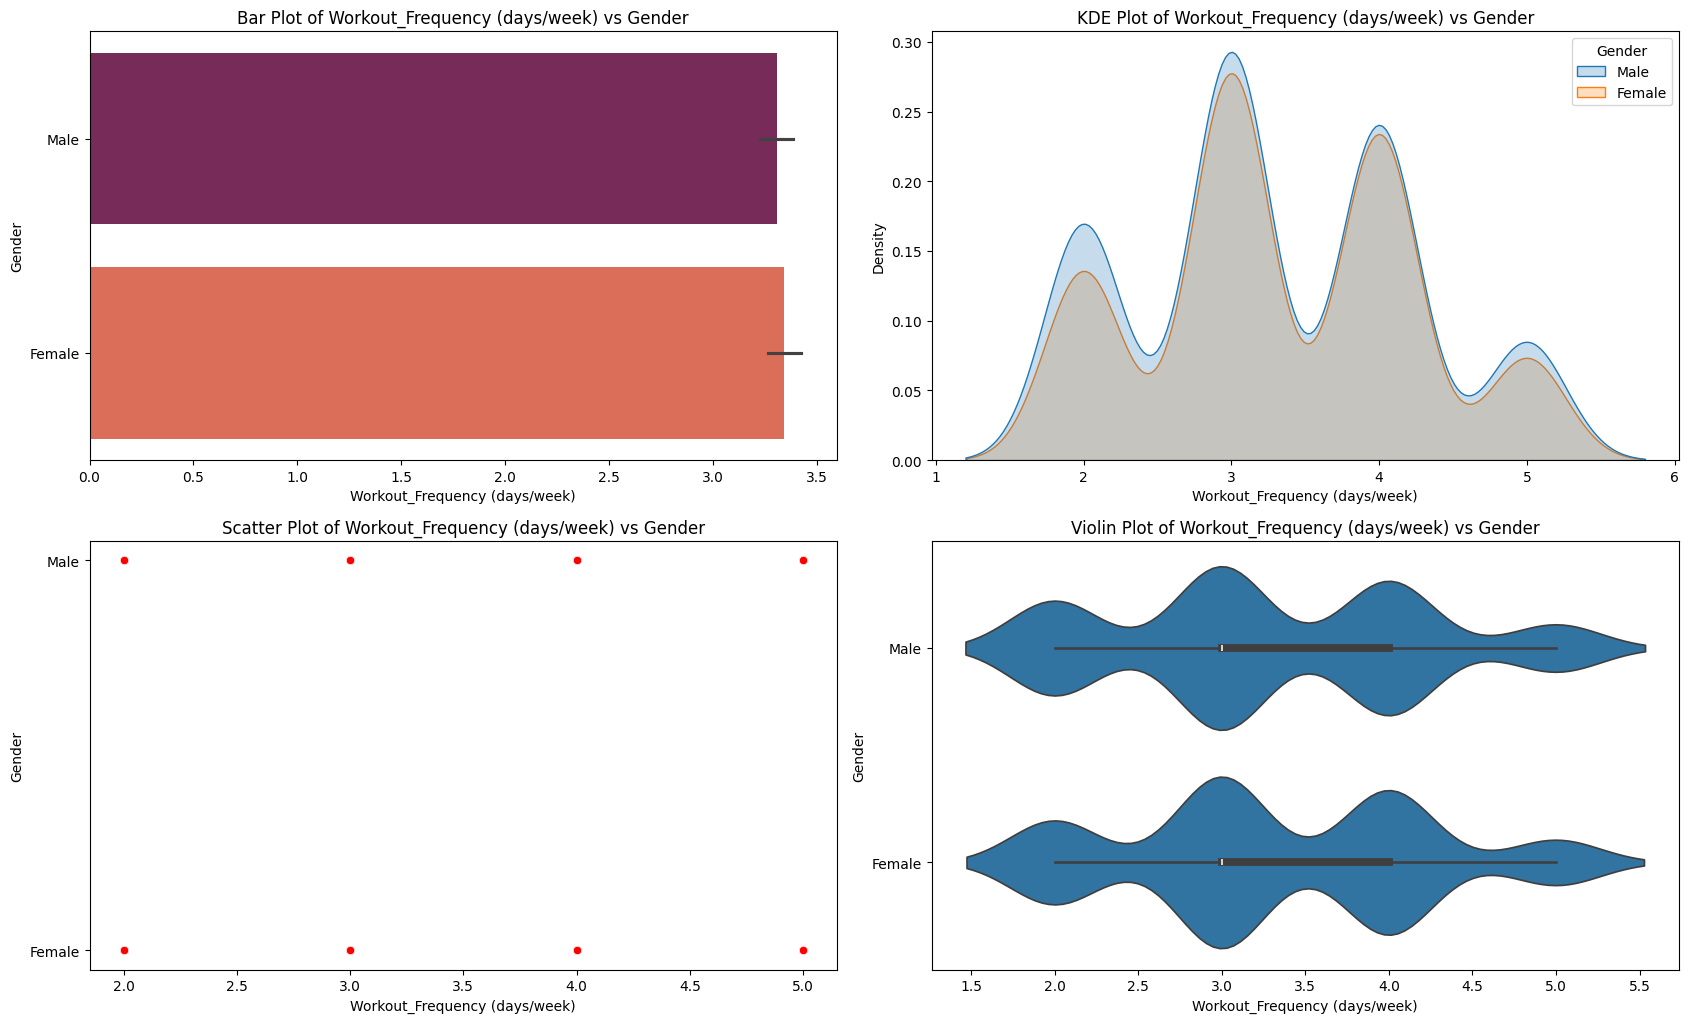

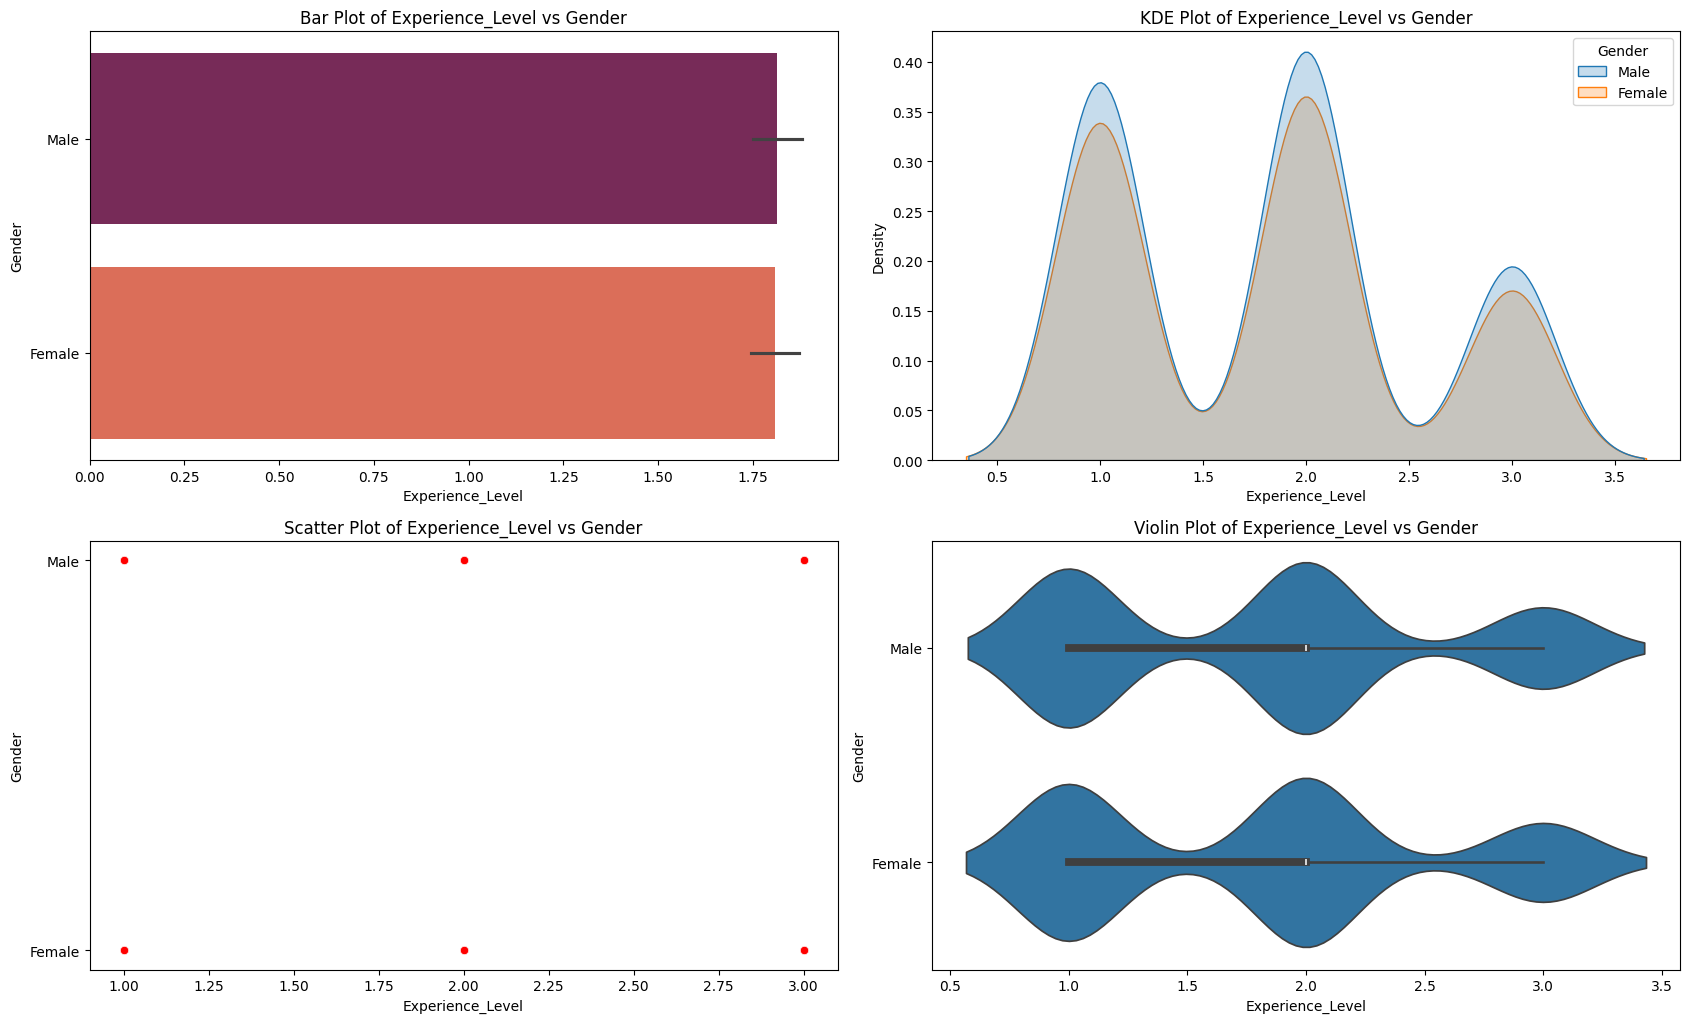

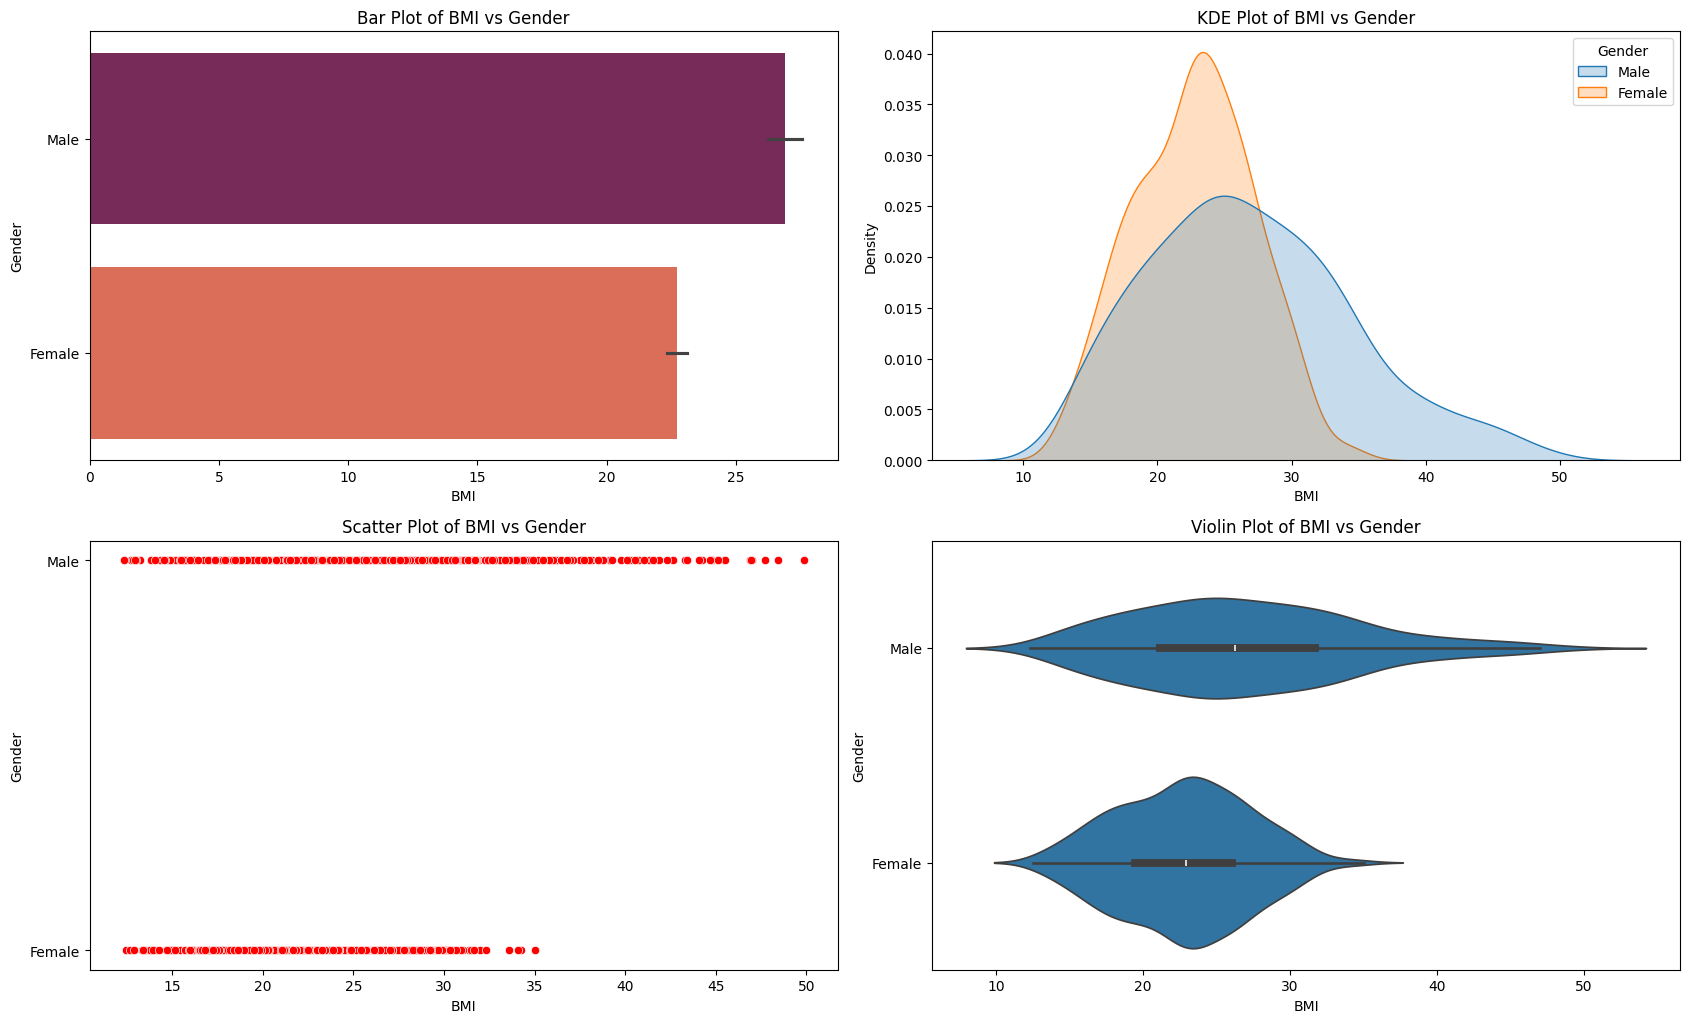

In [86]:
catego_num(df , ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI'] , 'Gender' )

### Observation 
- Strength and Cardio dominate slightly, while Yoga and HIIT are also well-represented, showing a balanced workout distribution.
- males have a higher average weight than females.
- males have a slightly higher average height than females.
- males and females have very similar distributions of maximum BPM, with only minor variations.
- the distribution of average BPM is similar for both genders, with males having slightly higher density around 130 and 160 BPM.
- males generally have slightly higher resting BPM density between 60–70 BPM, while females peak slightly earlier around 55–60 BPM.
- males slightly dominate in session durations around 1.3 to 1.5 hours, while overall distributions for both genders are quite similar.
- males burn slightly more calories on average than females.
- males have a higher average water intake (around 3 liters) compared to females (around 2.2 liters).
- similar workout frequency patterns for both genders, with peaks at 2, 3, and 4 days per week, though males slightly dominate across all frequencies.
- both genders have similar experience level distributions, with peaks at beginner (1), intermediate (2), and advanced (3), though males slightly outnumber females at each level.
- males have a higher average BMI compared to females.

#### `Workout Type vs Numerical Features`

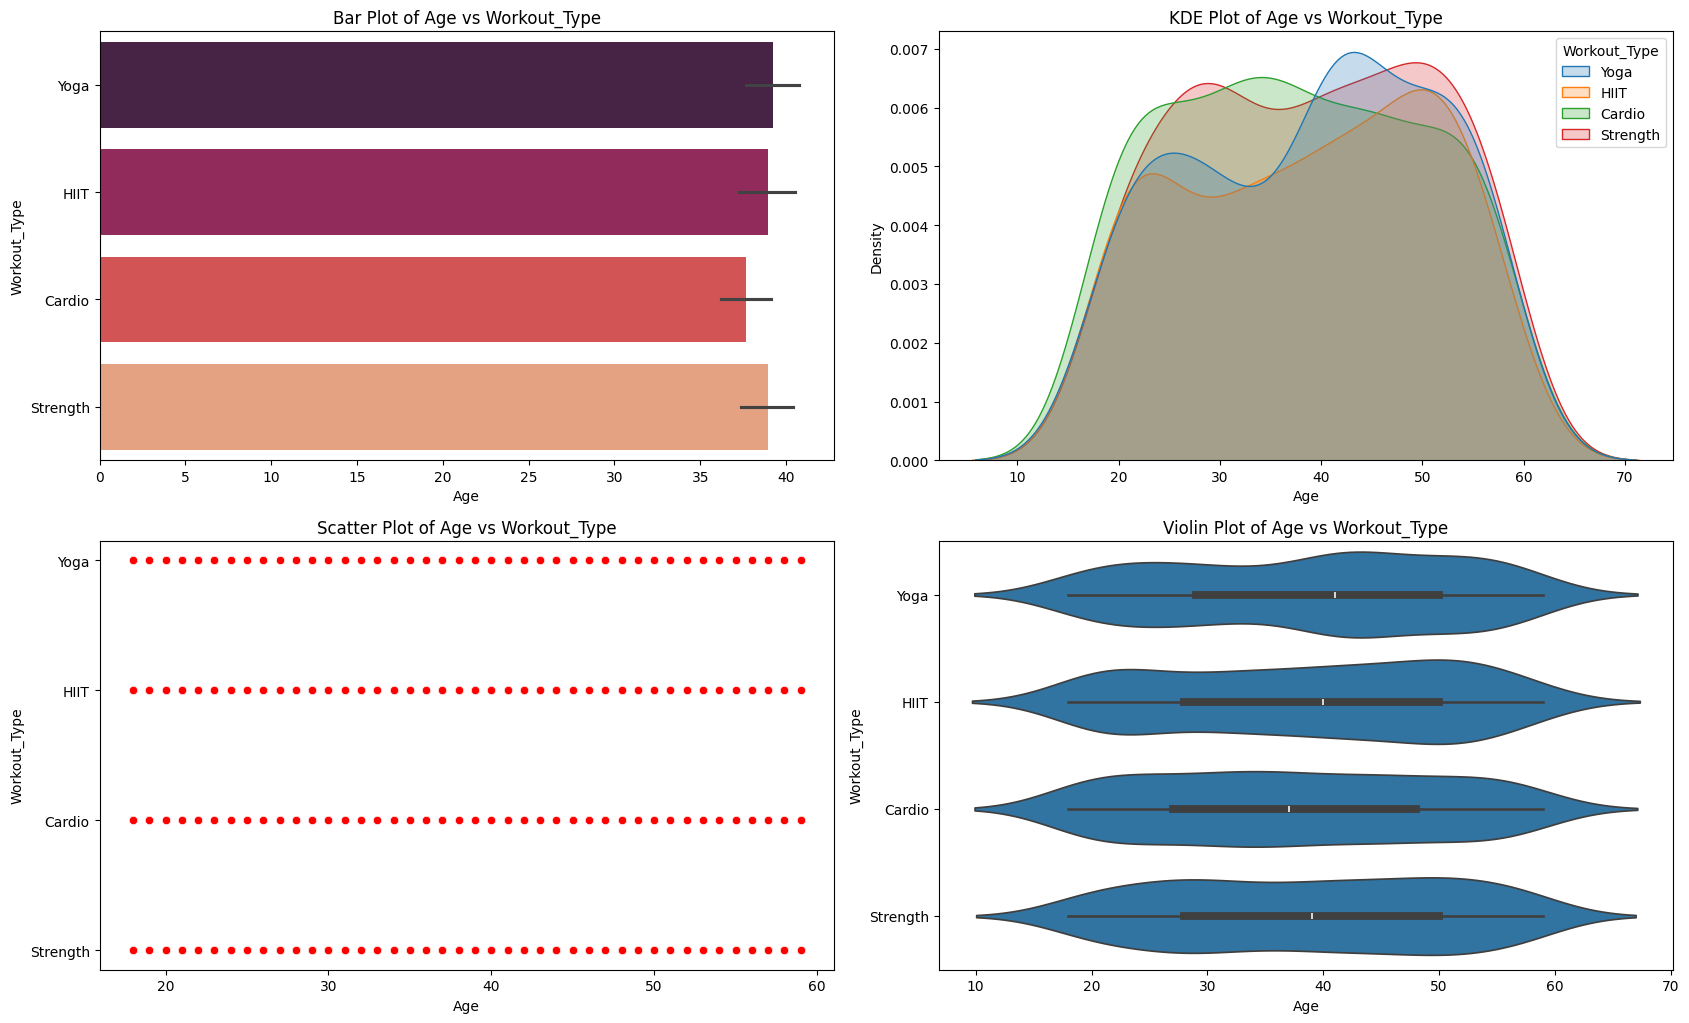

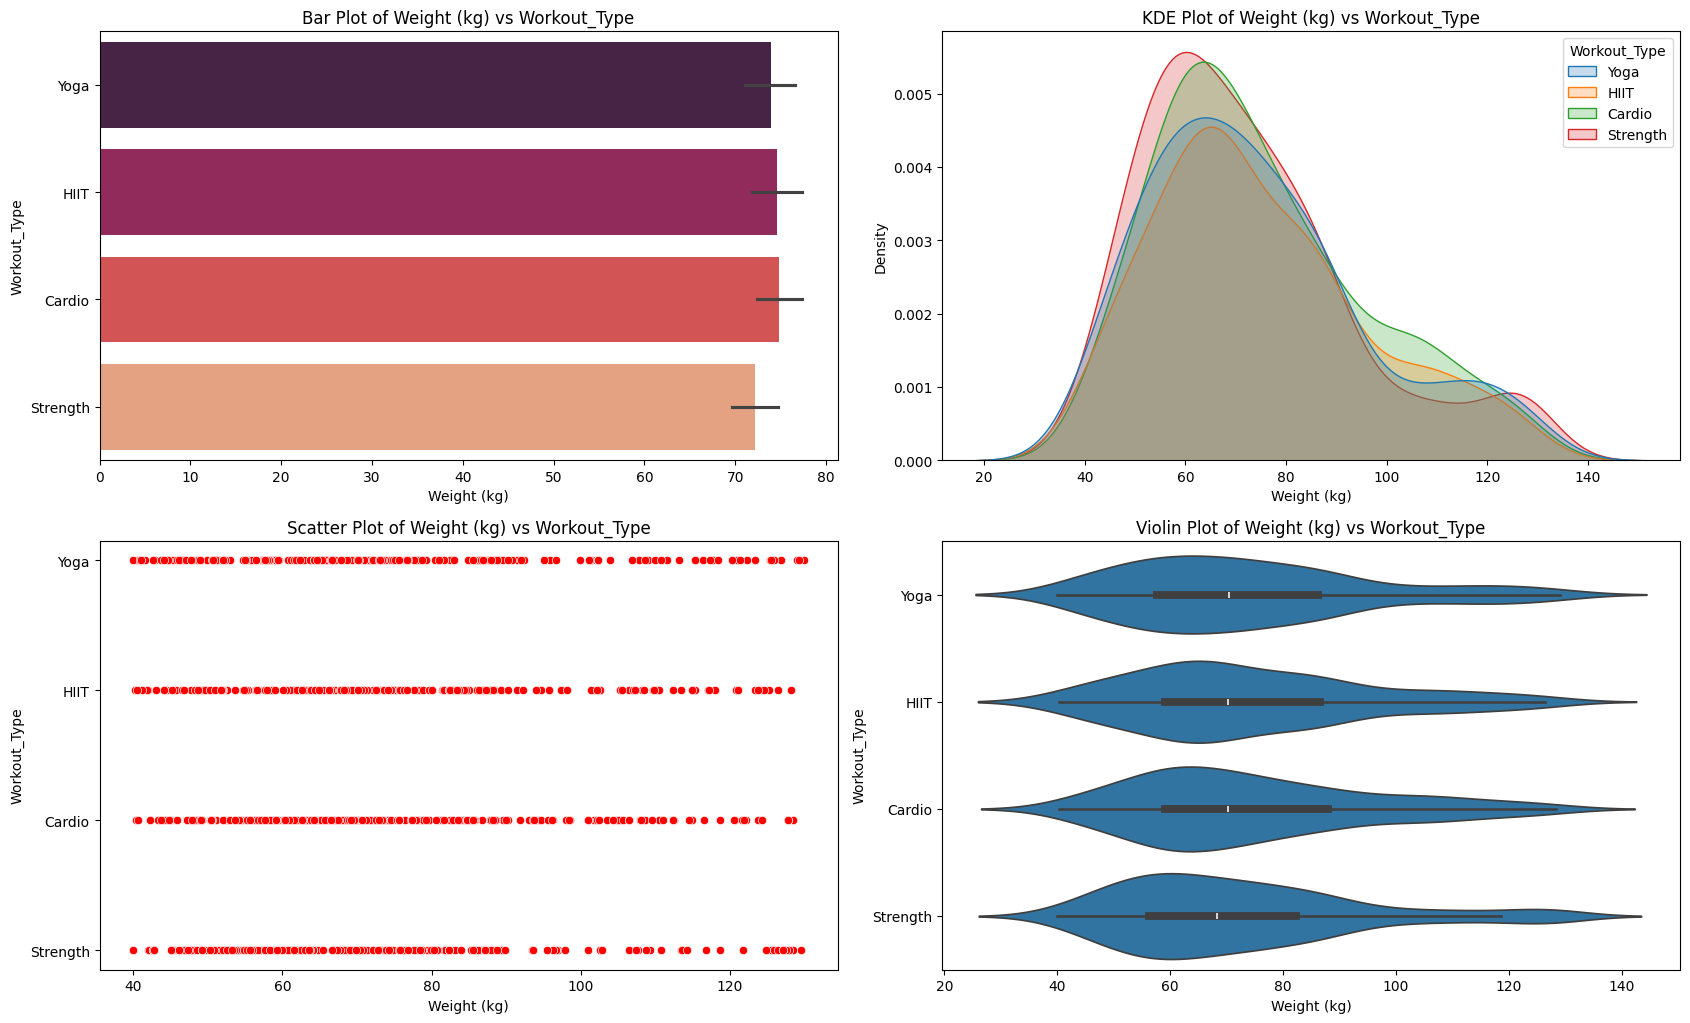

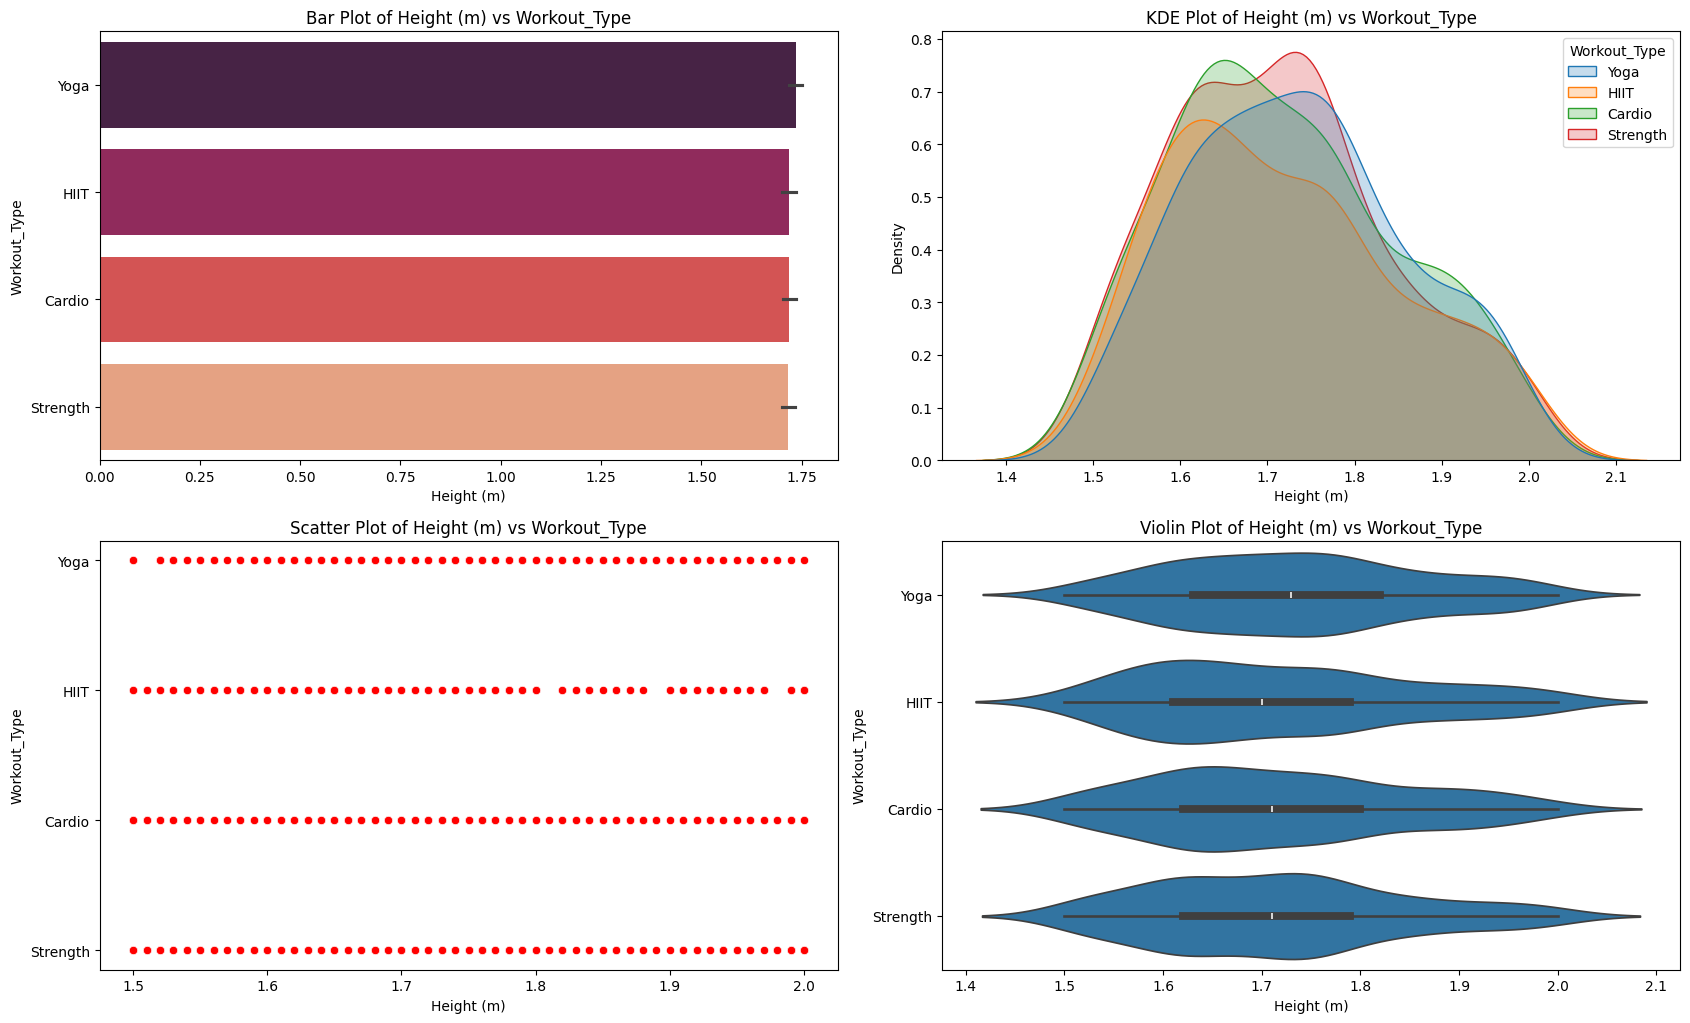

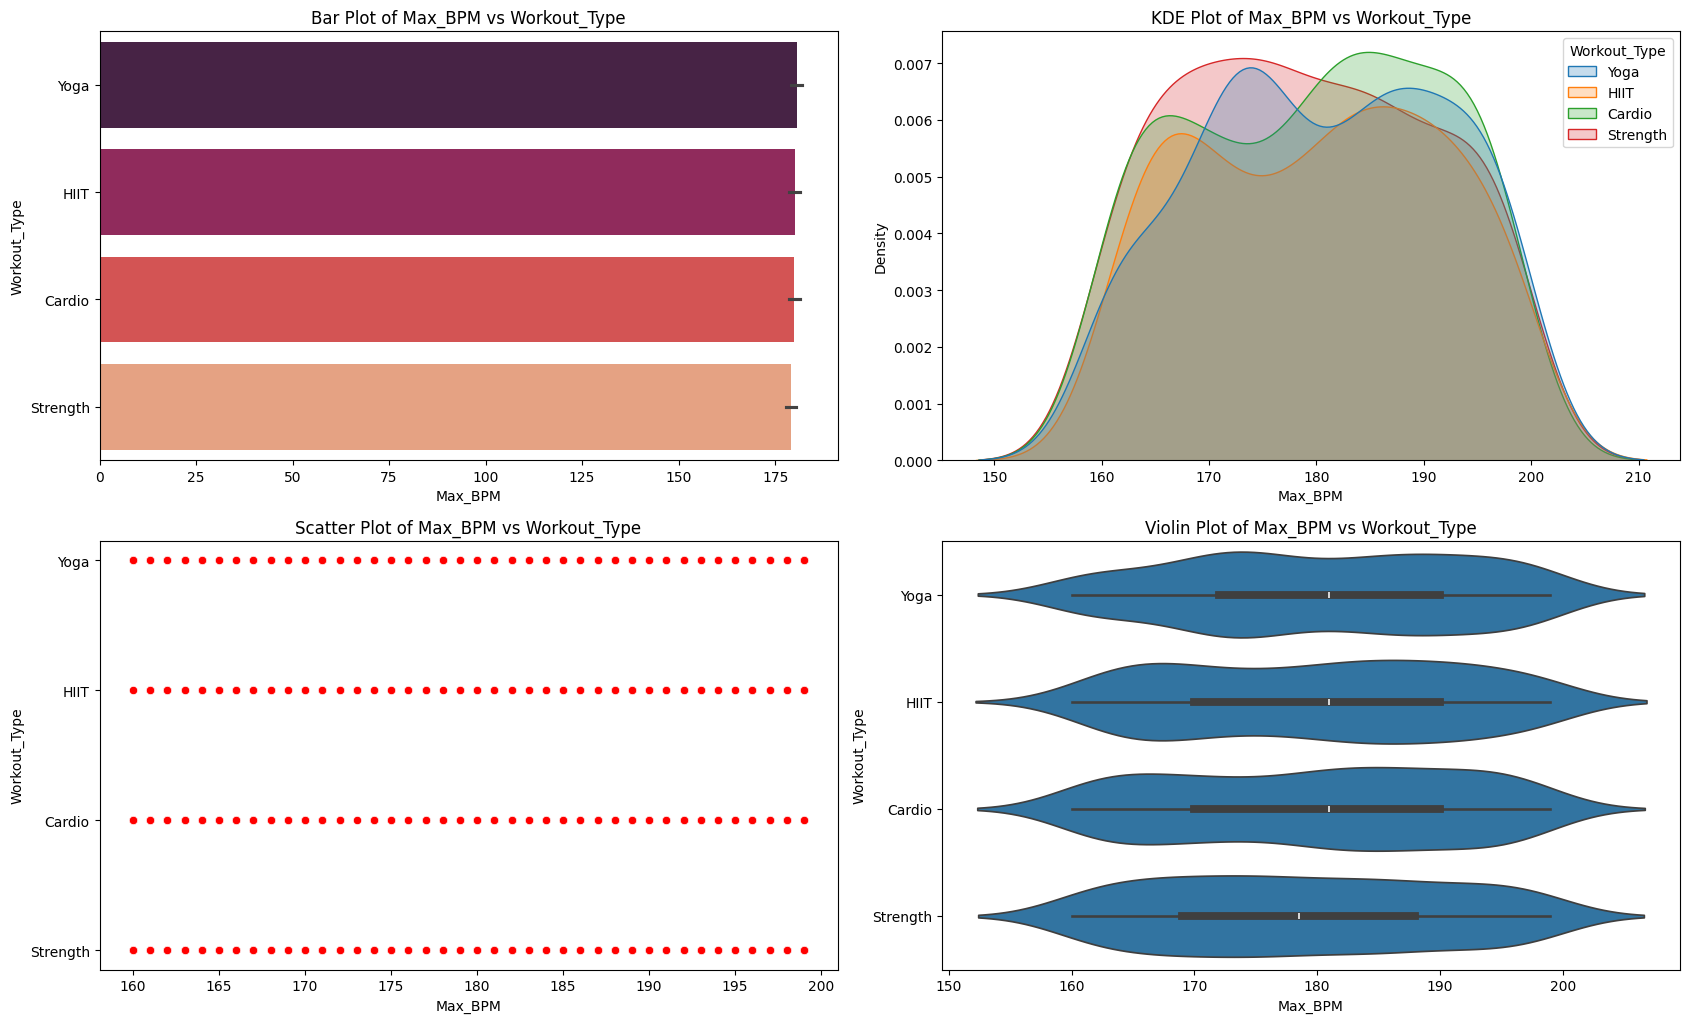

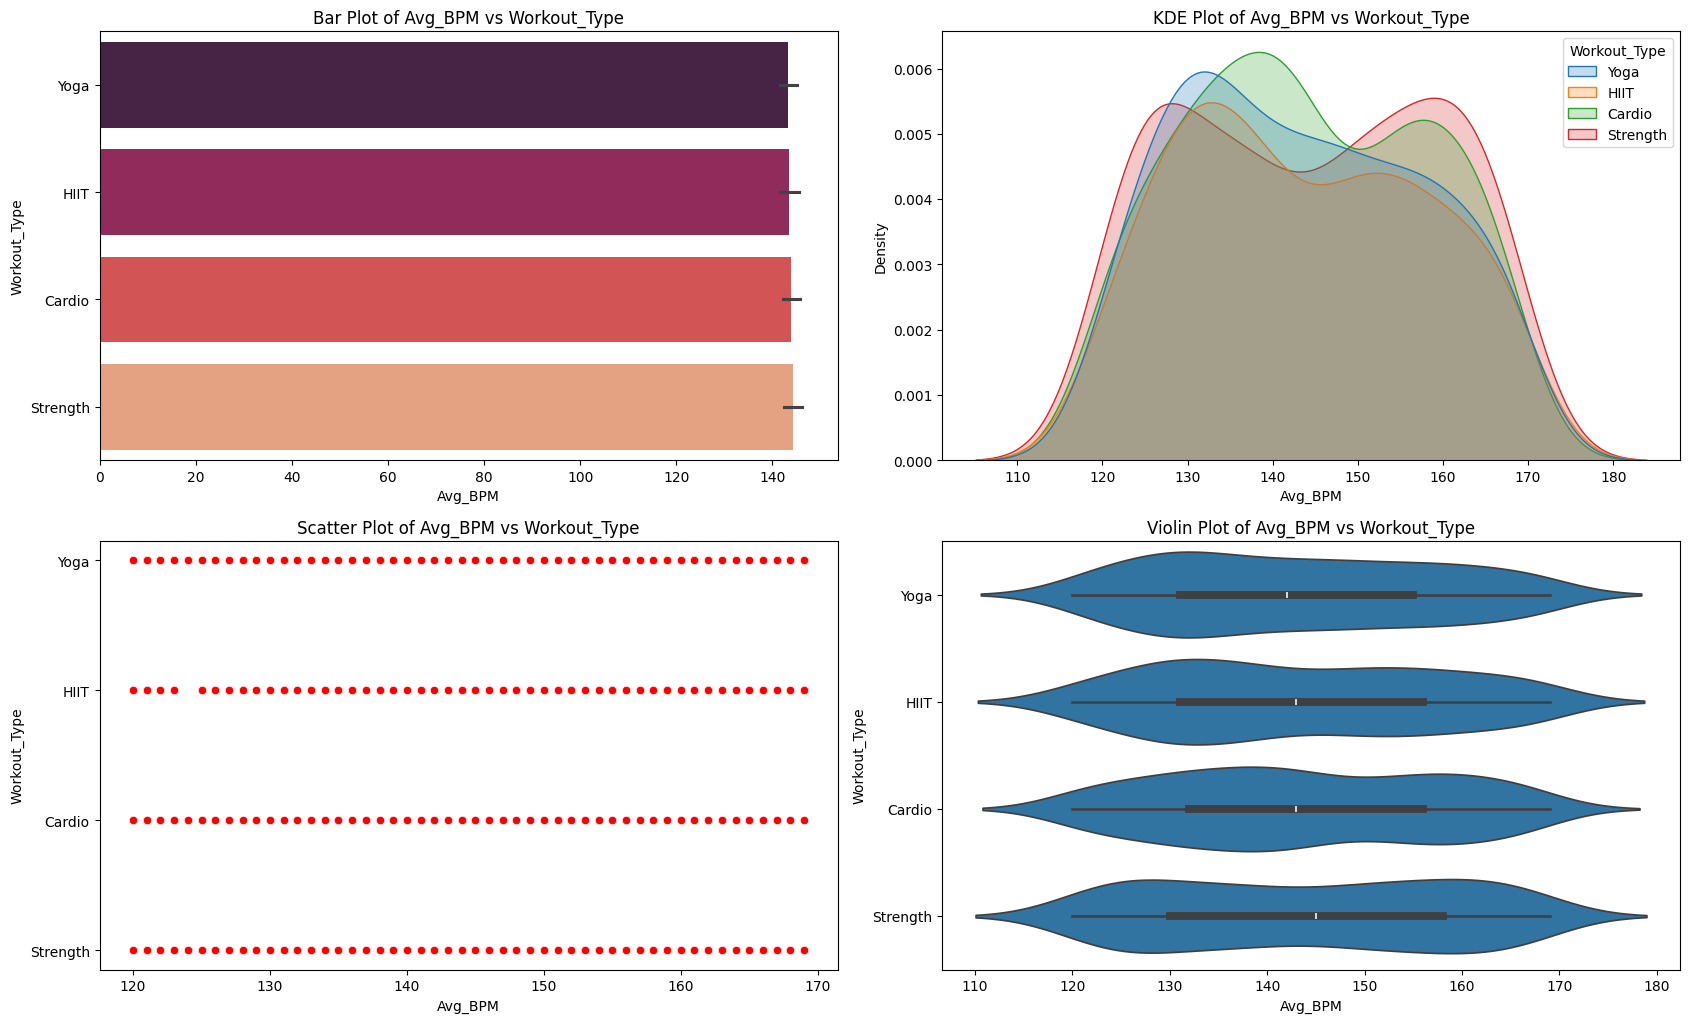

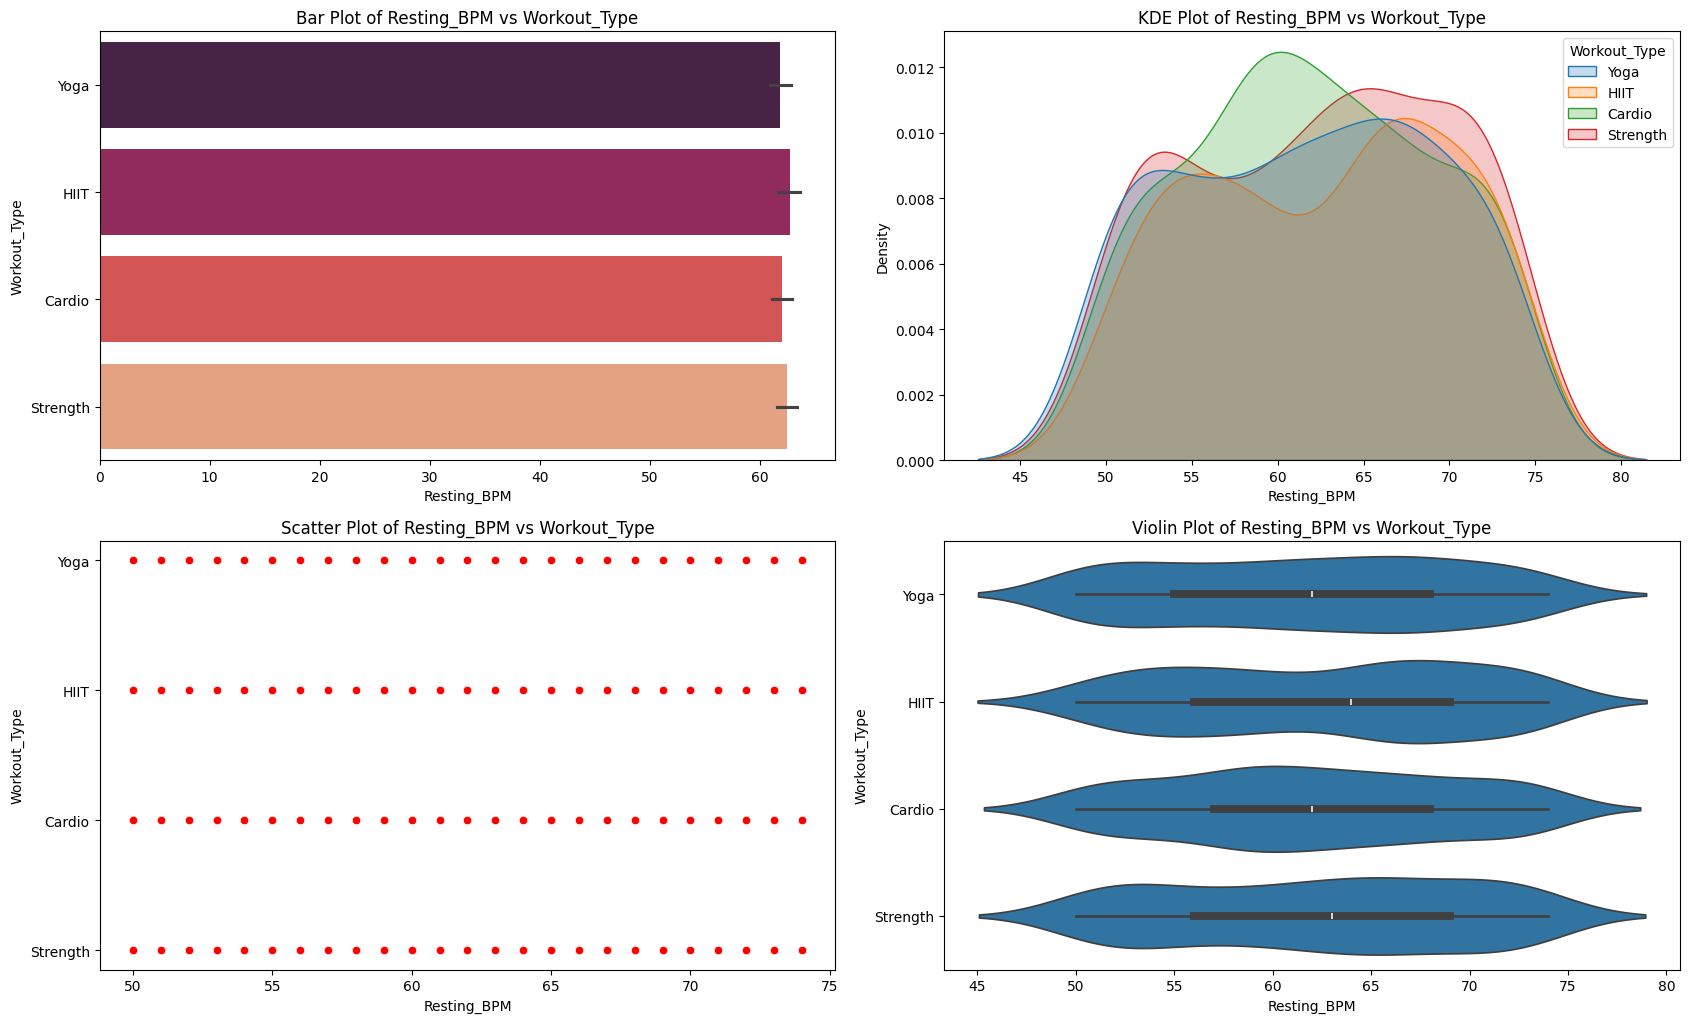

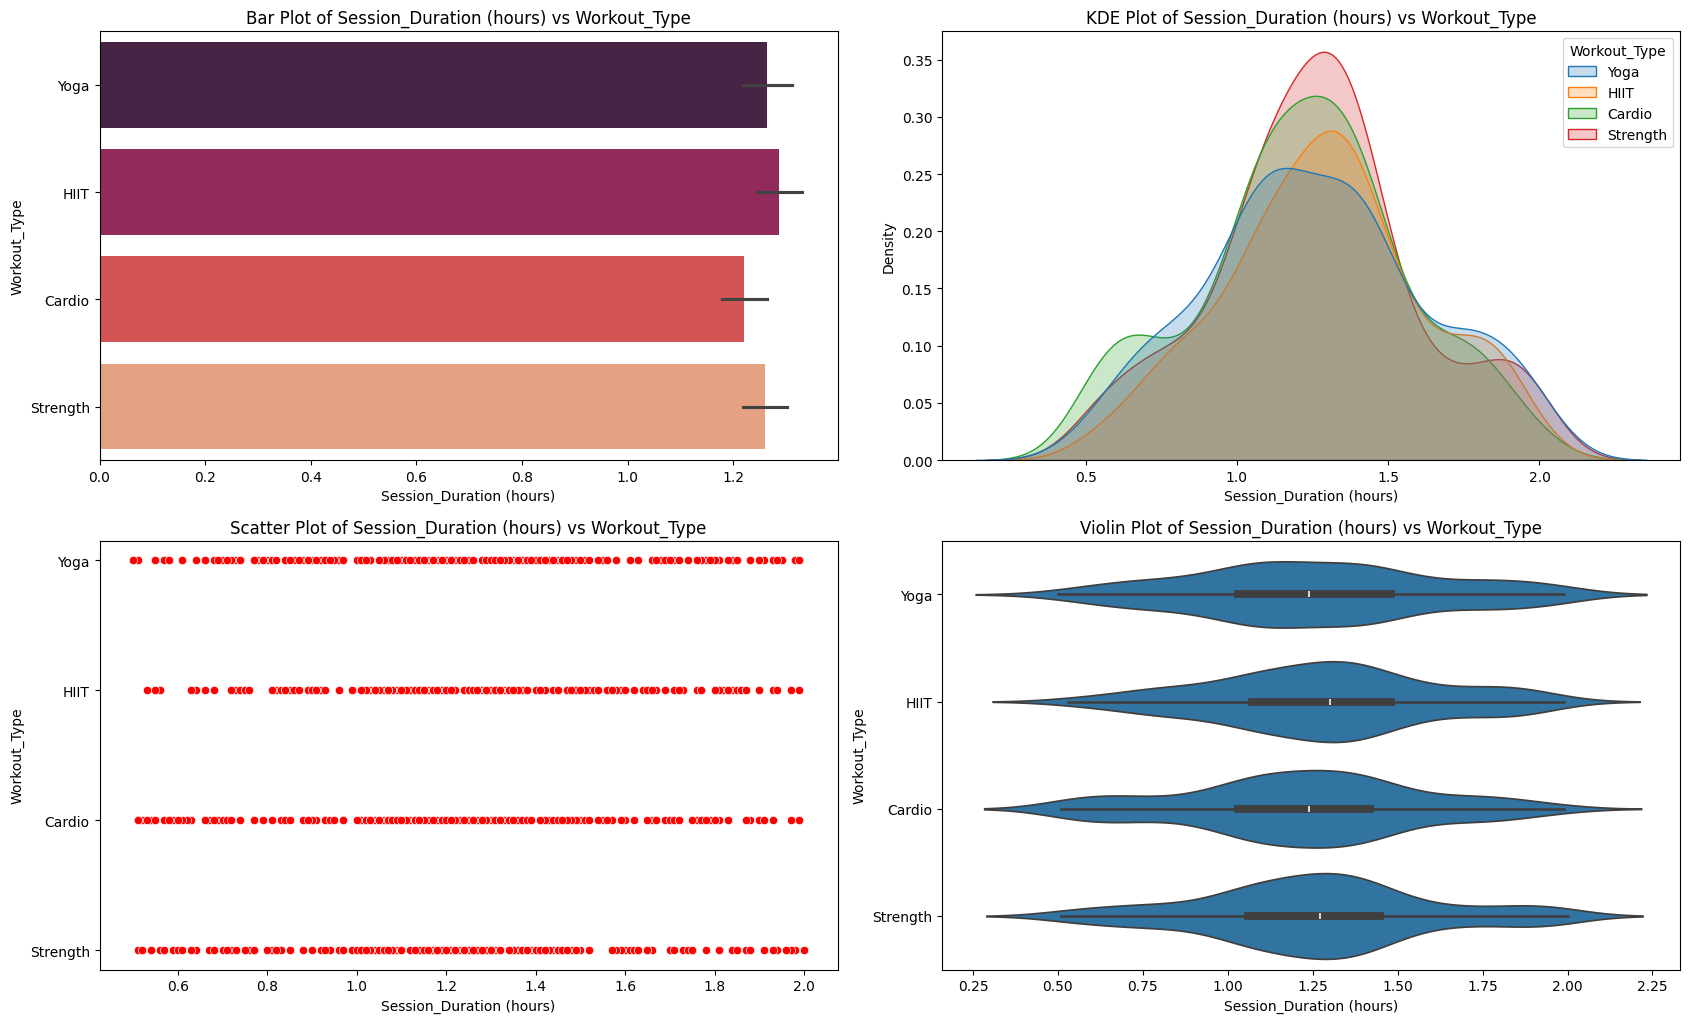

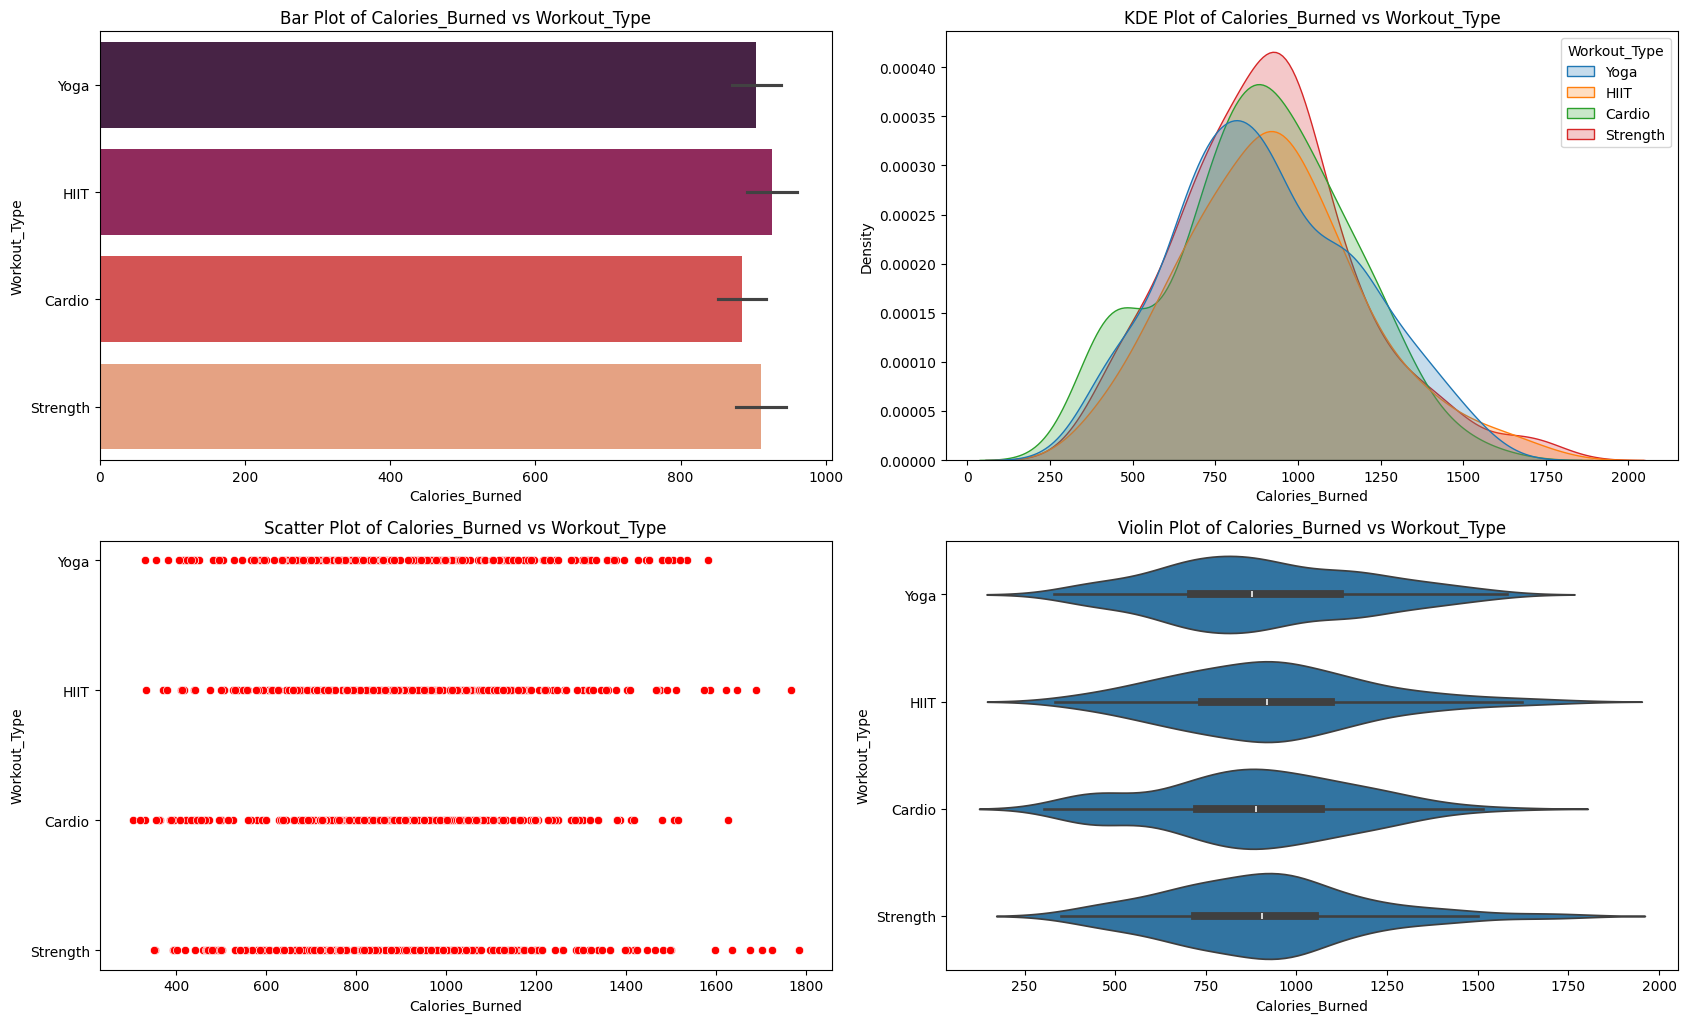

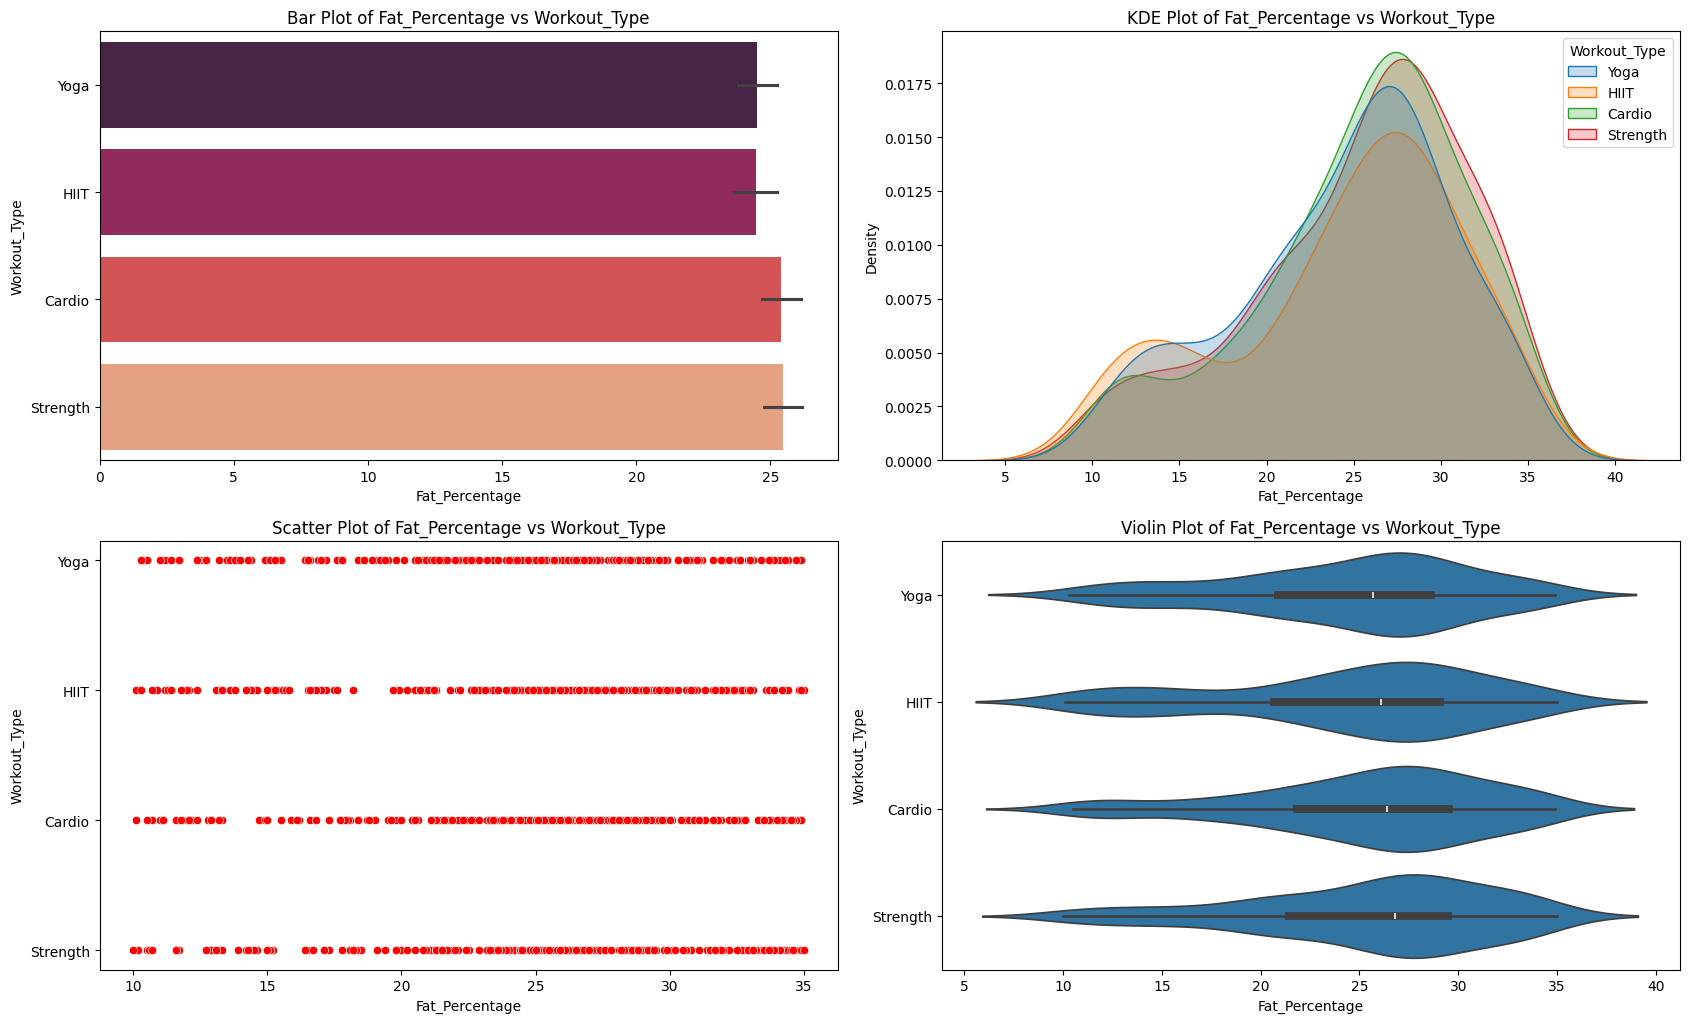

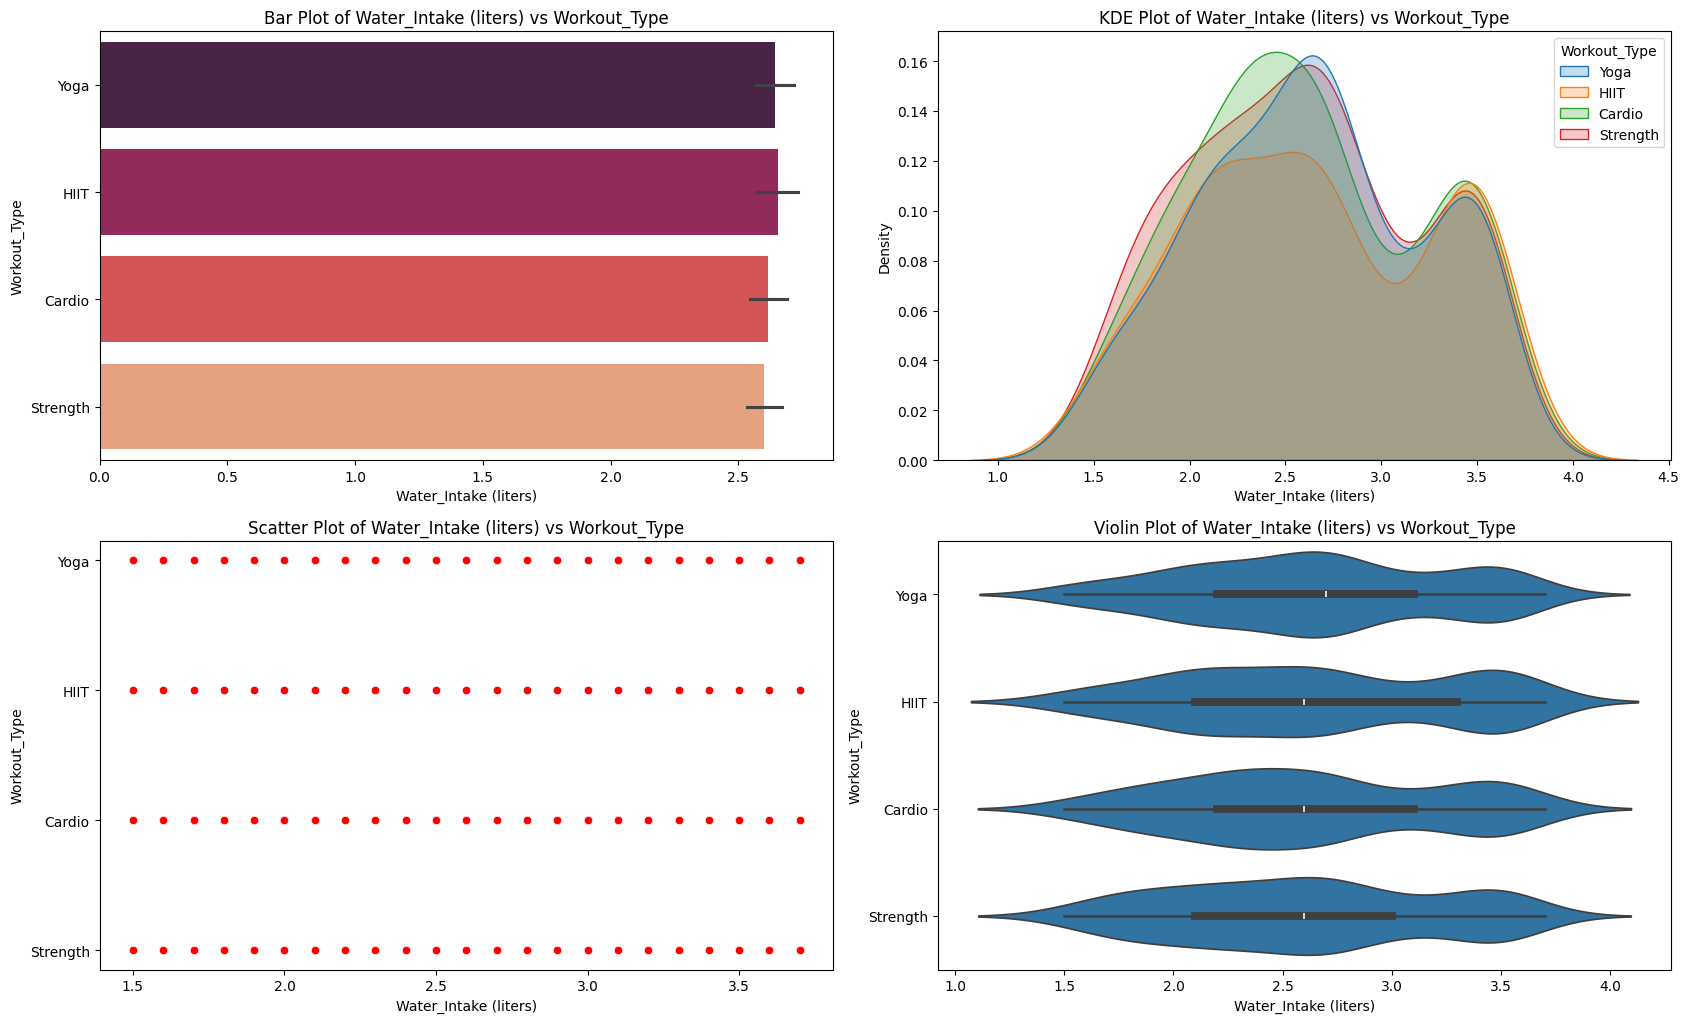

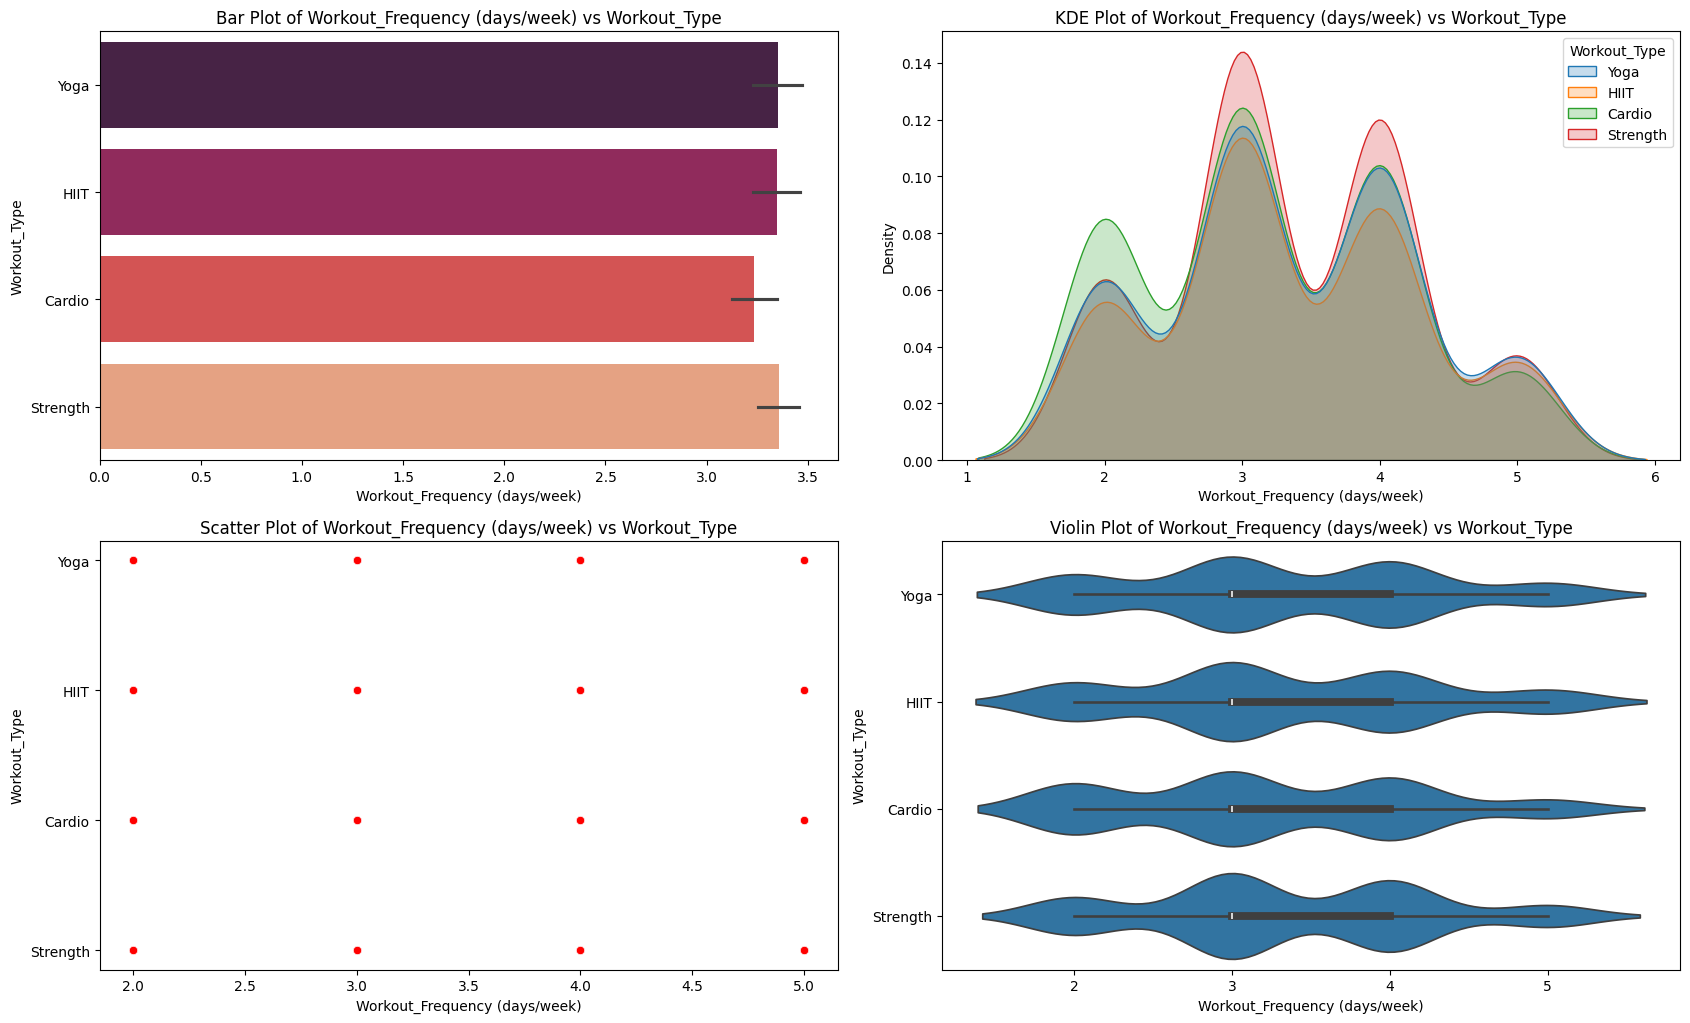

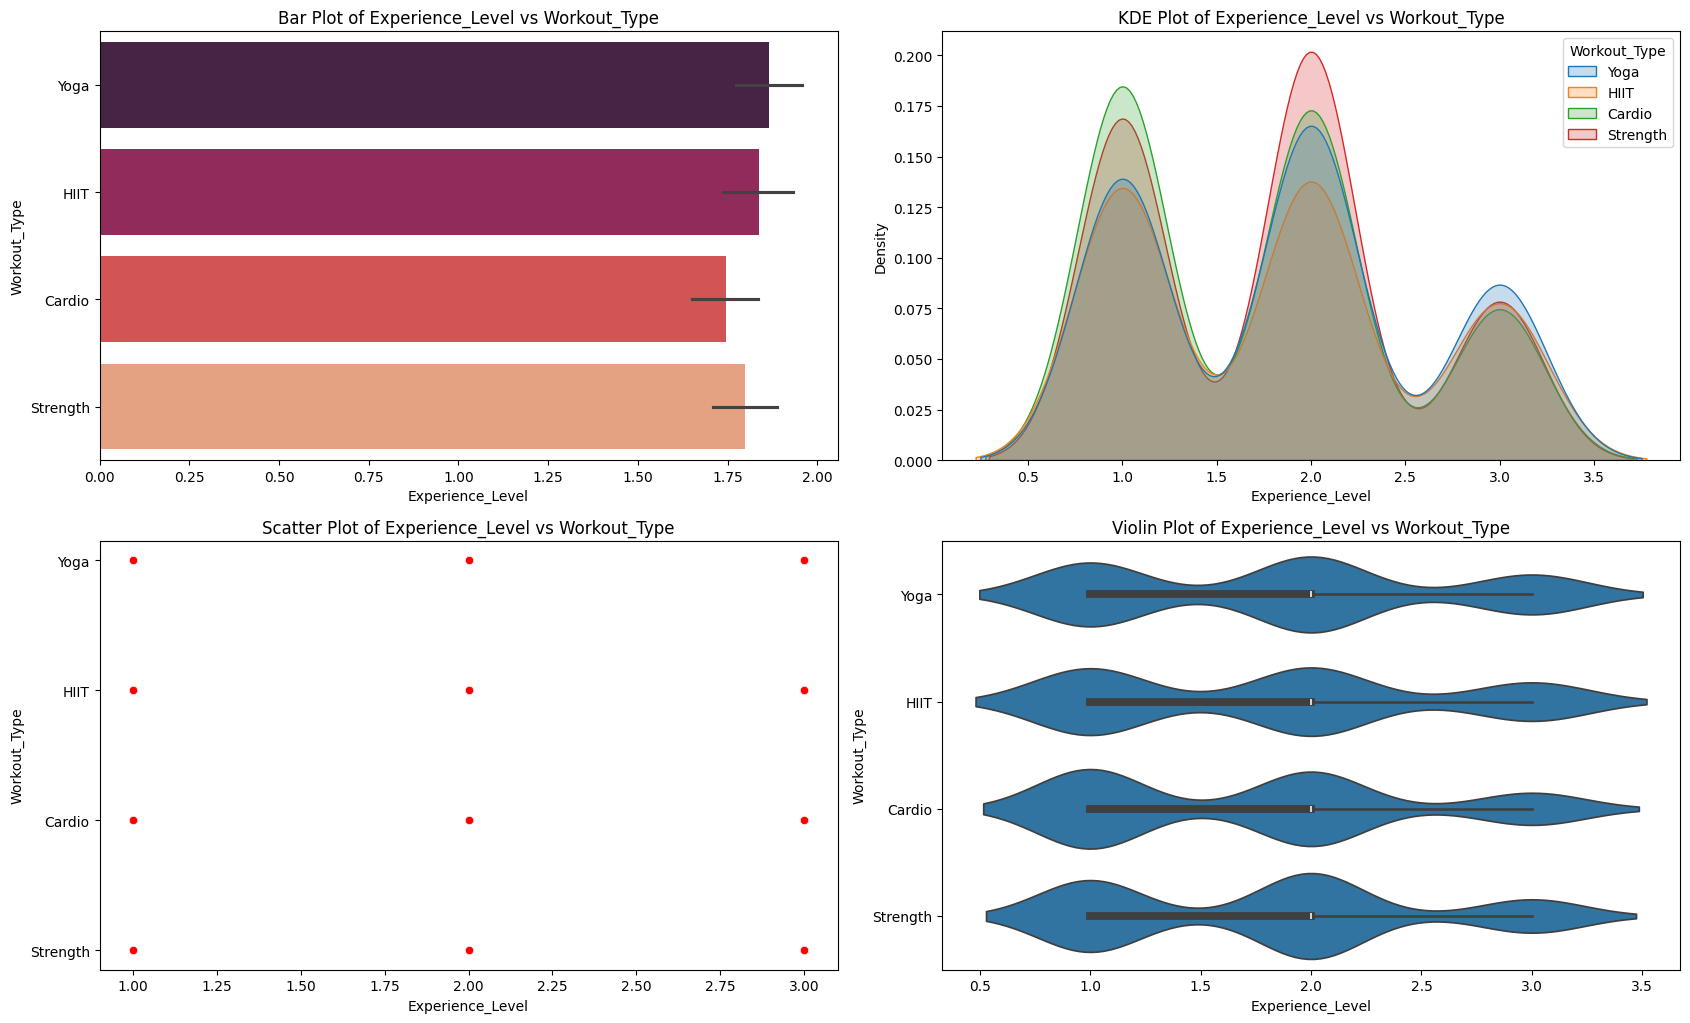

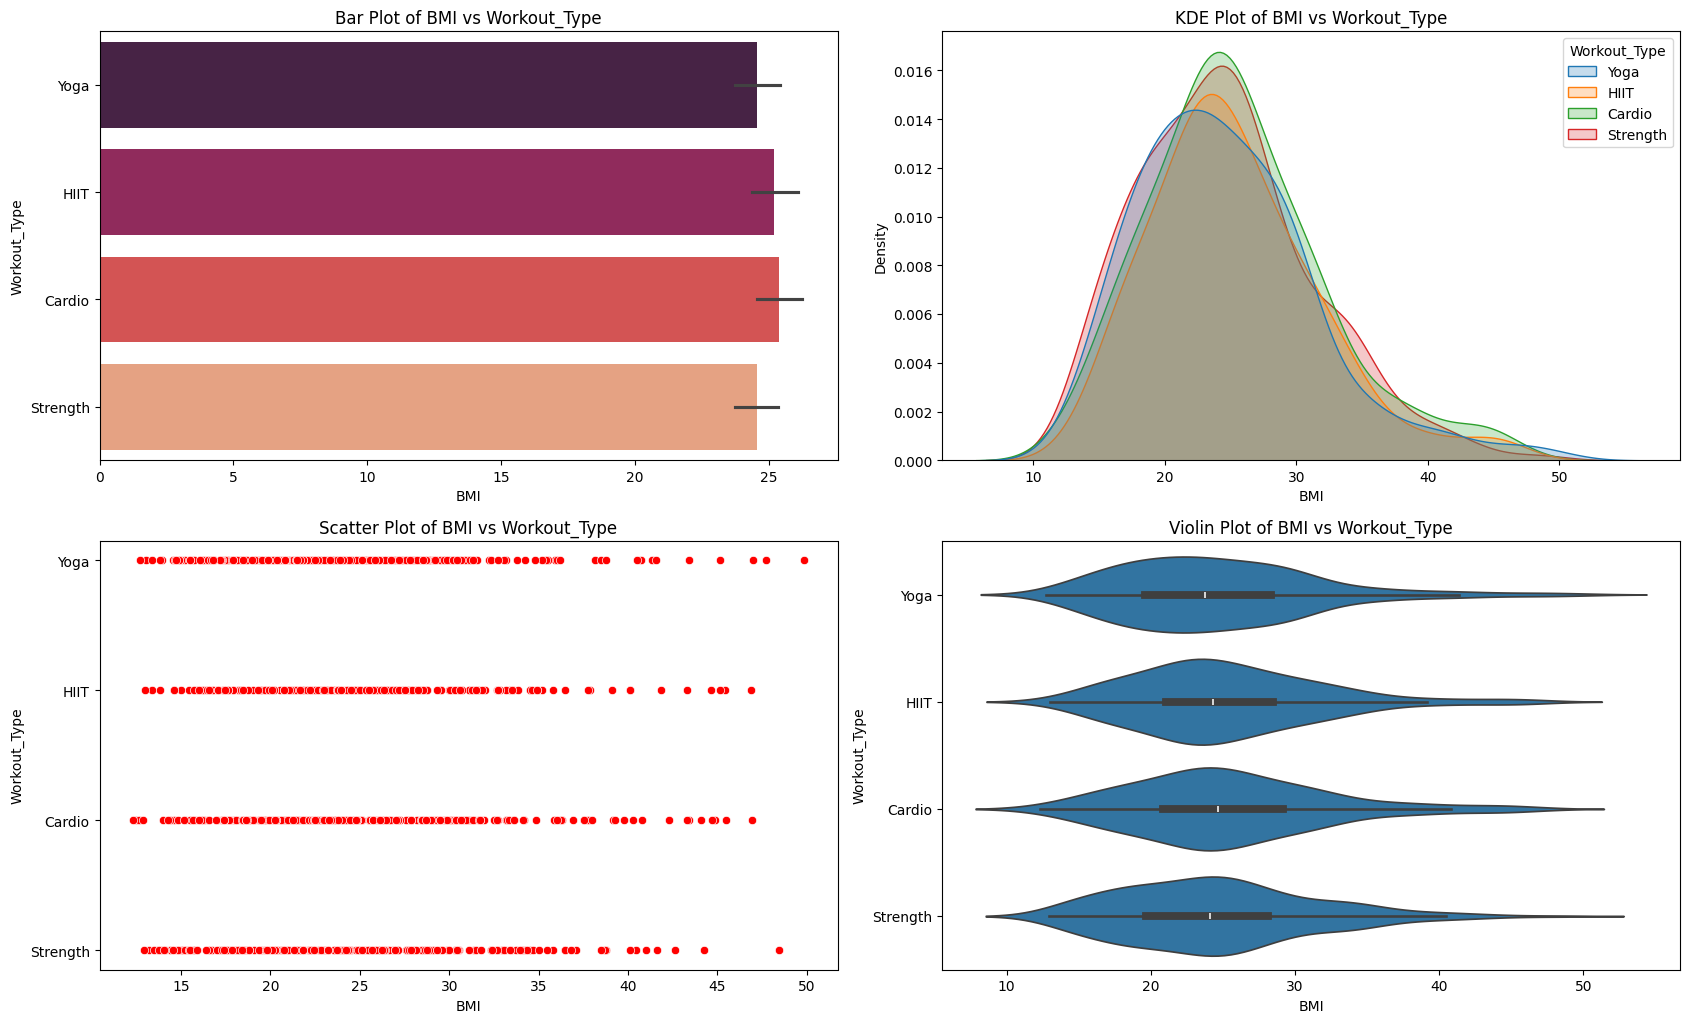

In [89]:
catego_num(df , ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI'] , 'Workout_Type' )

### Observation
- Across all workout types (Strength, Cardio, HIIT, Yoga), the average participant age is quite similar, around 38–40 years.
- Participants across all workout types (Yoga, HIIT, Cardio, Strength) have a similar average weight, mostly around 73–75 kg.
- Heights across workout types mostly cluster between 1.6 m and 1.8 m, with slight variation peaks around 1.75 m, Yoga and HIIT near 1.7 m, and Cardio showing a wider spread.
- Resting heart rates (BPM) are quite similar across workout types, all averaging around 60–62 BPM with only minor variation.
- All workout types (Yoga, HIIT, Cardio, and Strength) have almost identical session durations, averaging close to 1.2 hours, with very little variation between them.
- Calories Burned vary widely (≈350–1800) across all workout types, with no single workout consistently burning the most
- Cardio participants tend to have the highest fat percentage.Yoga and HIIT participants show slightly lower fat percentages.Strength training individuals appear to have the lowest fat percentage, reflecting its role in improving body composition and muscle mass.
- Strength and cardio workouts show the highest water intake, while yoga and HIIT participants drink slightly less.
- Yoga, HIIT, and Strength are performed more frequently per week compared to Cardio is slightly less.
- peaks in experience levels around 1.0, 2.0, and 3.0, with Strength showing the highest density near level 2.0.
- The bar plot shows that average BMI is quite similar across all workout types, with Strength and Cardio slightly higher than Yoga and HIIT.

## Numerical vs Numerical

In [120]:
num_df

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI'],
      dtype='object')

#### `Calories vs Age`

<Axes: xlabel='Age', ylabel='Calories_Burned'>

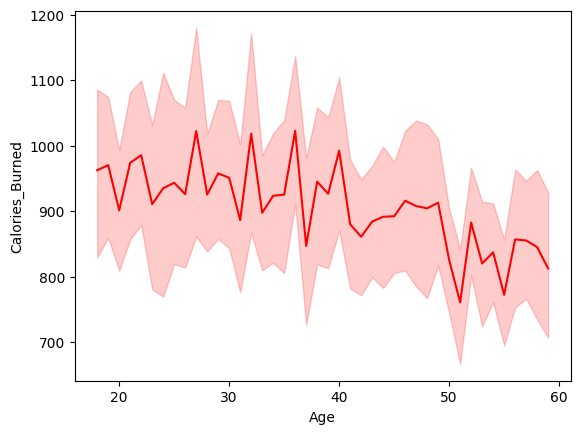

In [123]:
sns.lineplot(data = df , x = 'Age' , y = 'Calories_Burned' , color = 'red')

### Observation 
- The plot indicates that younger individuals tend to burn more calories.

#### `Calories vs Height`

<Axes: xlabel='Height (m)', ylabel='Calories_Burned'>

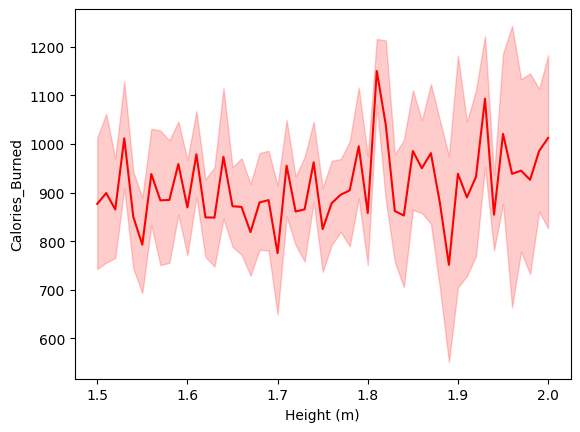

In [128]:
sns.lineplot(data = df , x = 'Height (m)' , y = 'Calories_Burned' , color = 'red')

### Observation 
- The trend suggests that individuals with a height between 1.8 and 1.9 meters tend to burn more calories.

#### `Calories vs Max BPM`

<Axes: xlabel='Max_BPM', ylabel='Calories_Burned'>

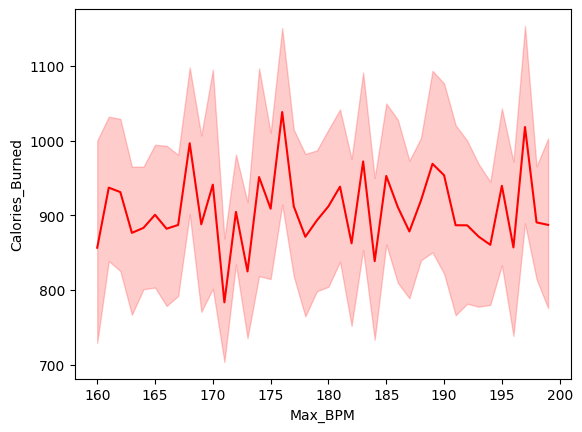

In [131]:
sns.lineplot(data = df , x = 'Max_BPM' , y = 'Calories_Burned' , color = 'red')

### Observation 
- The line plot shows that calories burned fluctuate between 800–1000 across different Max_BPM values (160–200), without a clear increasing or decreasing trend.

#### `Calories vs Session Duration`

<Axes: xlabel='Session_Duration (hours)', ylabel='Calories_Burned'>

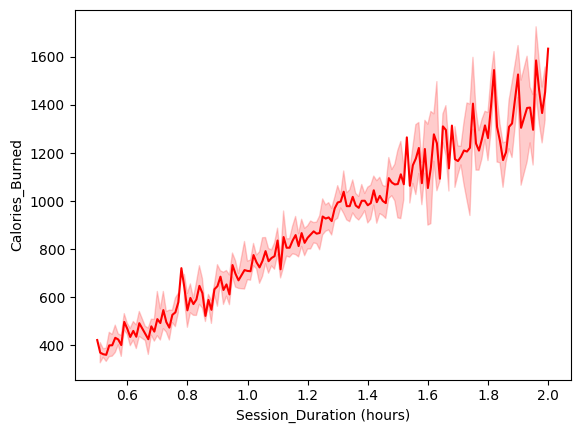

In [134]:
sns.lineplot(data = df , x = 'Session_Duration (hours)' , y = 'Calories_Burned' , color = 'red')

### Observation 
- The plot indicates that longer session durations are associated with higher calorie burn.


#### `Calories vs Fat Percentage`

<Axes: xlabel='Fat_Percentage', ylabel='Calories_Burned'>

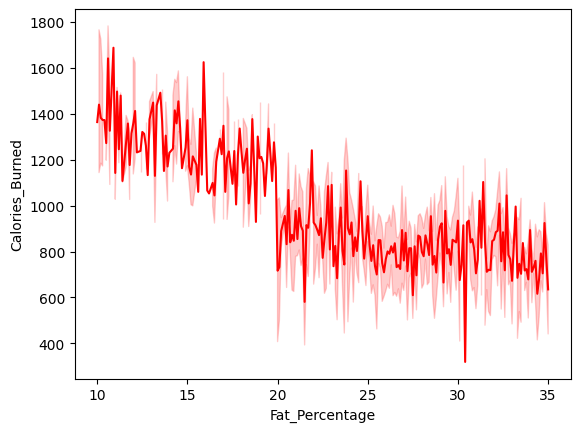

In [137]:
sns.lineplot(data = df , x = 'Fat_Percentage' , y = 'Calories_Burned' , color = 'red')

### Observation
- This plot shows that as Fat_Percentage increases, the Calories_Burned generally decreases

#### `Calories vs Water Intake`

<Axes: xlabel='Water_Intake (liters)', ylabel='Calories_Burned'>

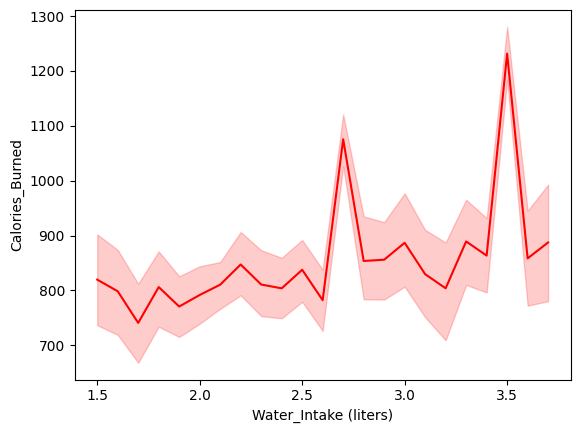

In [140]:
sns.lineplot(data = df , x = 'Water_Intake (liters)' , y = 'Calories_Burned' , color = 'red')

### Observation 
- The plot shows that individuals with water intake between 2.5–3.0 liters and around 3.5 liters tend to burn the highest calories.

#### `Calories vs Workout Frequency`

<Axes: xlabel='Workout_Frequency (days/week)', ylabel='Calories_Burned'>

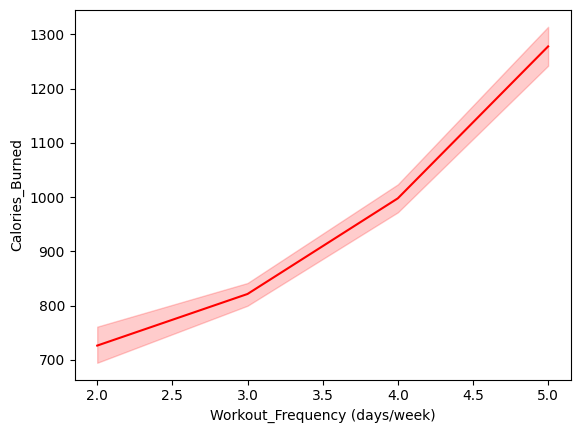

In [145]:
sns.lineplot(data = df , x = 'Workout_Frequency (days/week)' , y = 'Calories_Burned' , color = 'red')

### Observation 
- This plot shows that as Workout_Frequency (days/week) increases, Calories_Burned also increases steadily

#### `Calories vs Experience Level`

<Axes: xlabel='Experience_Level', ylabel='Calories_Burned'>

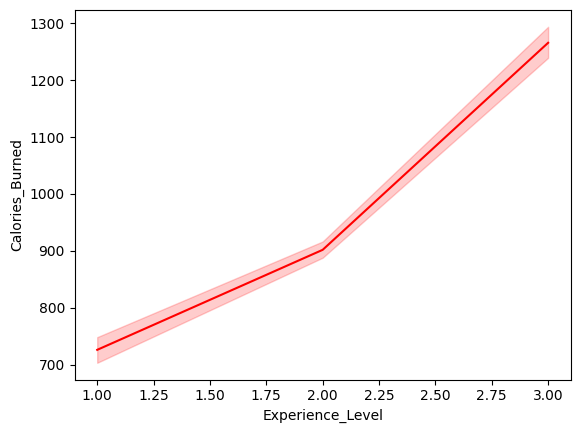

In [148]:
sns.lineplot(data = df , x = 'Experience_Level' , y = 'Calories_Burned' , color = 'red')

### Observation 
- This plot shows that as Experience_Level increases, Calories_Burned also increases significantly

## Categorical vs Categorical

In [162]:
cat_df

Index(['Gender', 'Workout_Type'], dtype='object')

In [164]:
def cat_cat(df , col1 , col2 , head = 10):
    # Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    top_values = contingency_table.sum(axis=1).nlargest(head).index
    contingency_table = contingency_table.loc[top_values]
    
    contingency_table_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100 # Convert contingency table to percentages
    print(contingency_table_percent)

    plt.figure(figsize = (15,6))

    # Bar plot
    # plt.subplot(1,2,1)
    # sns.barplot(data = contingency_table_percent.T , orient = 'h')
    # plt.title(f'Top {head} categories in {col1} vs {col2}')
    # plt.xlabel('Percentage')
    # plt.ylabel(col1)

    #Heat Map
    plt.subplot(1,2,2)
    sns.heatmap(contingency_table_percent , annot = True , fmt = '.2f' , cmap = 'coolwarm' , cbar_kws = {'label' : 'Percentage'})
    plt.xlabel(f'{col2}')
    plt.ylabel(f'{col1}')
    plt.title(f'Heatmap of {col1} vs {col2}')
    plt.show()

Workout_Type     Cardio       HIIT   Strength       Yoga
Gender                                                  
Male          25.244618  22.309198  26.418787  26.027397
Female        27.272727  23.160173  26.623377  22.943723


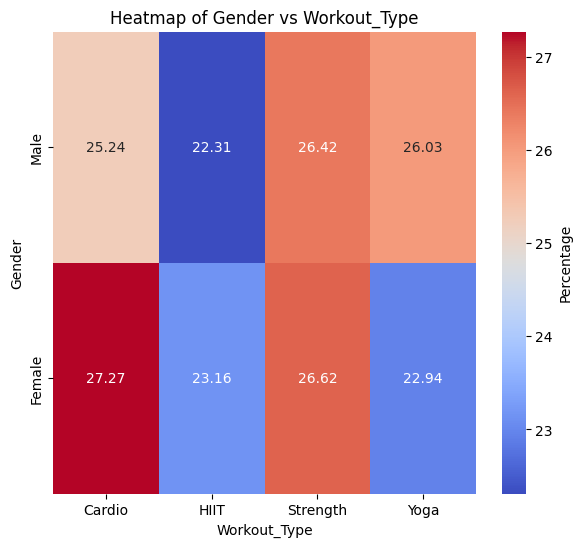

In [166]:
cat_cat(df , 'Gender' , 'Workout_Type')

### Observation 
- Cardio is more preferred by Females (27.27%) than Males (25.24%).
- HIIT is slightly more common among Females (23.16%) than Males (22.31%).
- Strength training is similarly favored by both genders, slightly more by Females (26.62%) than Males (26.42%).
- Yoga is more preferred by Males (26.03%) than Females (22.94%).

In [170]:
print(num_df)
print(cat_df)

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI'],
      dtype='object')
Index(['Gender', 'Workout_Type'], dtype='object')


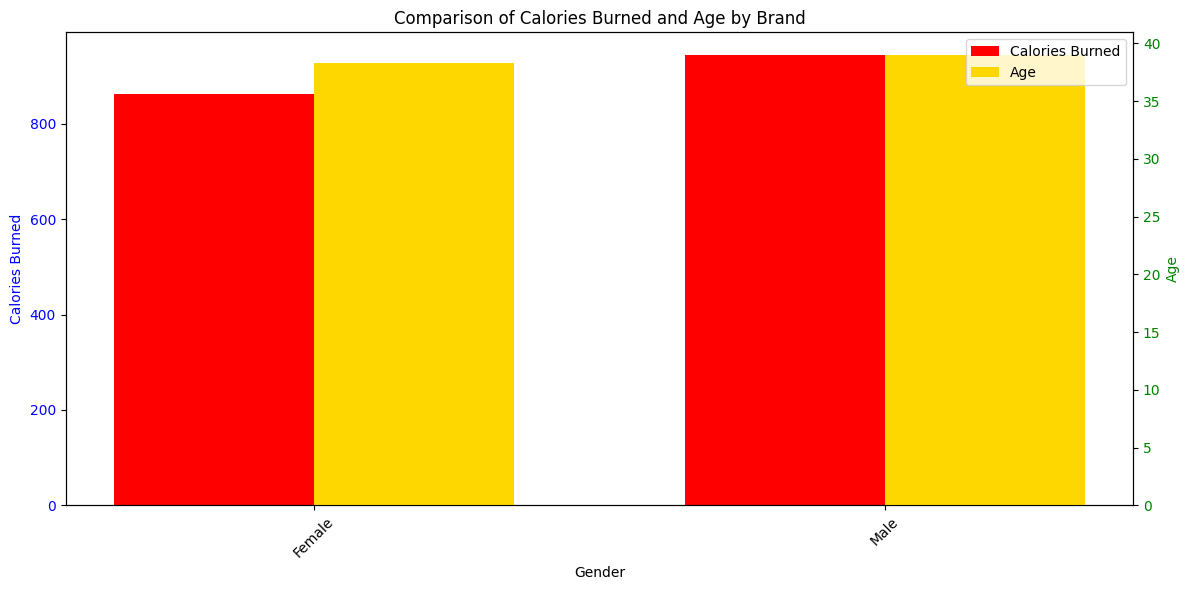

In [174]:
grouped = df.groupby('Gender')[['Calories_Burned', 'Age']].mean().reset_index()

# Set position of bars on X axis
brands = grouped['Gender']
x = np.arange(len(brands))
width = 0.35

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary axis for Price
bar1 = ax1.bar(x - width/2, grouped['Calories_Burned'], width, label='Calories Burned', color='red')
ax1.set_ylabel('Calories Burned', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary axis for ABV%
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, grouped['Age'], width, label='Age', color='gold')
ax2.set_ylabel('Age', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# X-axis settings
ax1.set_xlabel('Gender')
ax1.set_xticks(x)
ax1.set_xticklabels(brands, rotation=45)

# Title
plt.title('Comparison of Calories Burned and Age by Brand')

# Legends
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


### Observation 
- Males burn more calories than females.
- The average age is nearly the same for both genders, around 40 years.

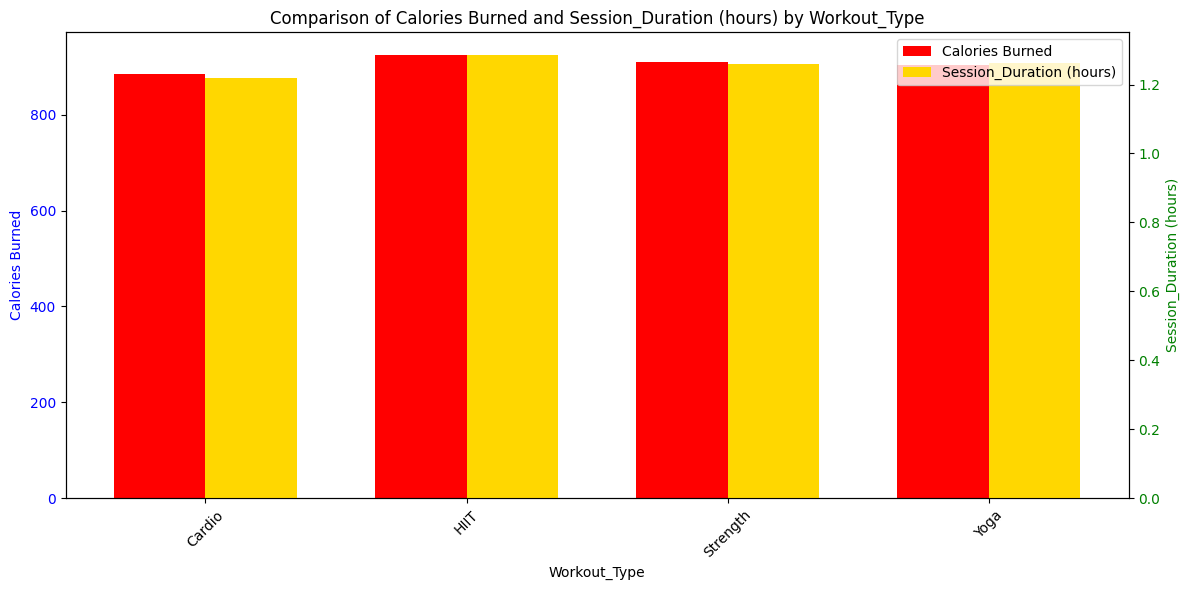

In [180]:
grouped = df.groupby('Workout_Type')[['Calories_Burned', 'Session_Duration (hours)']].mean().reset_index()

# Set position of bars on X axis
brands = grouped['Workout_Type']
x = np.arange(len(brands))
width = 0.35

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary axis for Price
bar1 = ax1.bar(x - width/2, grouped['Calories_Burned'], width, label='Calories Burned', color='red')
ax1.set_ylabel('Calories Burned', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary axis for ABV%
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, grouped['Session_Duration (hours)'], width, label='Session_Duration (hours)', color='gold')
ax2.set_ylabel('Session_Duration (hours)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# X-axis settings
ax1.set_xlabel('Workout_Type')
ax1.set_xticks(x)
ax1.set_xticklabels(brands, rotation=45)

# Title
plt.title('Comparison of Calories Burned and Session_Duration (hours) by Workout_Type')

# Legends
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


### Observation 
- HIIT shows the highest values for both Calories Burned and Session Duration.
- Cardio has the lowest in both metrics.
- Strength and Yoga fall in between, with Strength slightly above Yoga.

# Split the Data Set

In [186]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [202]:
y = df['Calories_Burned']
X = df[['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']]

In [204]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , train_size = 0.8 , random_state = 42)

In [206]:
x_train.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
967   20    Male         55.0        1.60      172      168           67   
365   39  Female         60.6        1.65      162      167           63   
559   54  Female         75.6        1.72      194      154           60   
33    24  Female         58.9        1.51      187      157           68   
31    20  Female         65.4        1.52      185      127           50   

     Session_Duration (hours) Workout_Type  Fat_Percentage  \
967                      1.12         Yoga            24.0   
365                      0.92         HIIT            27.6   
559                      0.97       Cardio            26.4   
33                       1.04       Cardio            31.7   
31                       1.03         Yoga            28.0   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
967                    3.2                              4                 2   
365                    1.7                              3                 1   
559                    1.9                              3                 1   
33                     2.5                              2                 1   
31                     2.2                              4                 2   

       BMI  
967  21.48  
365  22.26  
559  25.55  
33   25.83  
31   28.31

In [208]:
y_train.head()

967    1035.0
365     768.0
559     672.0
33      816.0
31      654.0
Name: Calories_Burned, dtype: float64

In [210]:
print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(778, 14) (778,)
(195, 14) (195,)


- x_train contains 778 rows and 14 features whereas y_train contains 778 rows
- Where x_test contains 195 rows and 14 features whereas y_test contains 195 rows

# Feature Scaling and Training the Model

## Scaling Numerical Features for training data

In [215]:
x_train_num = x_train.select_dtypes(include = [int , float])
x_train_num.head()

Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
967   20         55.0        1.60      172      168           67   
365   39         60.6        1.65      162      167           63   
559   54         75.6        1.72      194      154           60   
33    24         58.9        1.51      187      157           68   
31    20         65.4        1.52      185      127           50   

     Session_Duration (hours)  Fat_Percentage  Water_Intake (liters)  \
967                      1.12            24.0                    3.2   
365                      0.92            27.6                    1.7   
559                      0.97            26.4                    1.9   
33                       1.04            31.7                    2.5   
31                       1.03            28.0                    2.2   

     Workout_Frequency (days/week)  Experience_Level    BMI  
967                              4                 2  21.48  
365                              3                 1  22.26  
559                              3                 1  25.55  
33                               2                 1  25.83  
31                               4                 2  28.31

### Applying Standard Scalar

In [217]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

x_train_num_rescaled = pd.DataFrame(scalar.fit_transform(x_train_num) , 
                                    columns = x_train_num.columns , 
                                    index = x_train_num.index)

x_train_num_rescaled.head()

Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
967 -1.533045    -0.881205   -0.970088 -0.681086  1.700308     0.649407   
365  0.030354    -0.615657   -0.582452 -1.547194  1.630849     0.107741   
559  1.264617     0.095631   -0.039760  1.224352  0.727887    -0.298508   
33  -1.203908    -0.696270   -1.667834  0.618076  0.936263     0.784823   
31  -1.533045    -0.388045   -1.590307  0.444854 -1.147496    -1.652672   

     Session_Duration (hours)  Fat_Percentage  Water_Intake (liters)  \
967                 -0.403749       -0.165479               0.931987   
365                 -0.997711        0.410979              -1.563719   
559                 -0.849220        0.218827              -1.230958   
33                  -0.641334        1.067501              -0.232676   
31                  -0.671032        0.475030              -0.731817   

     Workout_Frequency (days/week)  Experience_Level       BMI  
967                       0.742043          0.261136 -0.497228  
365                      -0.370307         -1.102381 -0.378381  
559                      -0.370307         -1.102381  0.122906  
33                       -1.482656         -1.102381  0.165569  
31                        0.742043          0.261136  0.543439

In [219]:
x_train_num_rescaled.describe()

Age   Weight (kg)    Height (m)       Max_BPM       Avg_BPM  \
count  7.780000e+02  7.780000e+02  7.780000e+02  7.780000e+02  7.780000e+02   
mean  -1.141618e-16  2.785547e-16 -1.139334e-15  6.370226e-16  3.036703e-16   
std    1.000643e+00  1.000643e+00  1.000643e+00  1.000643e+00  1.000643e+00   
min   -1.697613e+00 -1.592493e+00 -1.745362e+00 -1.720415e+00 -1.633706e+00   
25%   -8.747717e-01 -7.389474e-01 -8.150336e-01 -8.543075e-01 -8.696614e-01   
50%    1.126384e-01 -2.031103e-01 -3.976017e-02  9.841124e-02 -3.615777e-02   
75%    8.531959e-01  5.899761e-01  6.579860e-01  8.562557e-01  8.668045e-01   
max    1.676038e+00  2.670494e+00  2.131006e+00  1.657406e+00  1.769767e+00   

        Resting_BPM  Session_Duration (hours)  Fat_Percentage  \
count  7.780000e+02              7.780000e+02    7.780000e+02   
mean   3.949997e-16              5.411267e-16   -2.739882e-17   
std    1.000643e+00              1.000643e+00    1.000643e+00   
min   -1.652672e+00             -2.245031e+00   -2.391247e+00   
25%   -8.401733e-01             -5.819376e-01   -5.818093e-01   
50%   -2.767507e-02              4.172238e-02    1.868014e-01   
75%    9.202395e-01              5.762881e-01    6.992085e-01   
max    1.597321e+00              2.179985e+00    1.595921e+00   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count           7.780000e+02                   7.780000e+02      7.780000e+02   
mean           -4.840458e-16                   2.602888e-16      5.936411e-17   
std             1.000643e+00                   1.000643e+00      1.000643e+00   
min            -1.896479e+00                  -1.482656e+00     -1.102381e+00   
25%            -7.318169e-01                  -3.703066e-01     -1.102381e+00   
50%            -6.629551e-02                  -3.703066e-01      2.611364e-01   
75%             9.319866e-01                   7.420429e-01      2.611364e-01   
max             1.763888e+00                   1.854392e+00      1.624654e+00   

                BMI  
count  7.780000e+02  
mean  -4.520805e-16  
std    1.000643e+00  
min   -1.892909e+00  
25%   -7.132077e-01  
50%   -1.239284e-01  
75%    5.628657e-01  
max    3.609063e+00

In [221]:
print('Number of Numerical Features:' , scalar.n_features_in_)
print('Mean of each column:' , scalar.mean_)
print('Std of each column:' , np.sqrt(scalar.var_))

Number of Numerical Features: 12
Mean of each column: [ 38.6311054   73.58329049   1.72512853 179.86375321 143.52056555
  62.20437018   1.25595116  25.03341902   2.63984576   3.33290488
   1.80848329  24.74335476]
Std of each column: [12.15300524 21.08849705  0.12898674 11.54590468 14.39705817  7.38463154
  0.33672196  6.24503413  0.60103251  0.89899804  0.73339722  6.56310189]


## Scaling Categorical Features for training data

In [224]:
x_train_cat = x_train.select_dtypes(include = ['object'])
x_train_cat.head()

Gender Workout_Type
967    Male         Yoga
365  Female         HIIT
559  Female       Cardio
33   Female       Cardio
31   Female         Yoga

### Applying OneHotEncoding

In [229]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output = False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(x_train_cat) , 
                               columns = encoder_.get_feature_names_out(x_train_cat.columns) , 
                               index = x_train_cat.index)

X_train_cat_ohe.head()

Gender_Female  Gender_Male  Workout_Type_Cardio  Workout_Type_HIIT  \
967            0.0          1.0                  0.0                0.0   
365            1.0          0.0                  0.0                1.0   
559            1.0          0.0                  1.0                0.0   
33             1.0          0.0                  1.0                0.0   
31             1.0          0.0                  0.0                0.0   

     Workout_Type_Strength  Workout_Type_Yoga  
967                    0.0                1.0  
365                    0.0                0.0  
559                    0.0                0.0  
33                     0.0                0.0  
31                     0.0                1.0

In [232]:
encoder_.categories_

[array(['Female', 'Male'], dtype=object),
 array(['Cardio', 'HIIT', 'Strength', 'Yoga'], dtype=object)]

## Concatinating the Encoded Categorical Features and Rescaled Numerical Features (Train Data)

In [240]:
x_train_transformed = pd.concat([x_train_num_rescaled , X_train_cat_ohe] , axis = 1)

x_train_transformed.head()

Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
967 -1.533045    -0.881205   -0.970088 -0.681086  1.700308     0.649407   
365  0.030354    -0.615657   -0.582452 -1.547194  1.630849     0.107741   
559  1.264617     0.095631   -0.039760  1.224352  0.727887    -0.298508   
33  -1.203908    -0.696270   -1.667834  0.618076  0.936263     0.784823   
31  -1.533045    -0.388045   -1.590307  0.444854 -1.147496    -1.652672   

     Session_Duration (hours)  Fat_Percentage  Water_Intake (liters)  \
967                 -0.403749       -0.165479               0.931987   
365                 -0.997711        0.410979              -1.563719   
559                 -0.849220        0.218827              -1.230958   
33                  -0.641334        1.067501              -0.232676   
31                  -0.671032        0.475030              -0.731817   

     Workout_Frequency (days/week)  Experience_Level       BMI  Gender_Female  \
967                       0.742043          0.261136 -0.497228            0.0   
365                      -0.370307         -1.102381 -0.378381            1.0   
559                      -0.370307         -1.102381  0.122906            1.0   
33                       -1.482656         -1.102381  0.165569            1.0   
31                        0.742043          0.261136  0.543439            1.0   

     Gender_Male  Workout_Type_Cardio  Workout_Type_HIIT  \
967          1.0                  0.0                0.0   
365          0.0                  0.0                1.0   
559          0.0                  1.0                0.0   
33           0.0                  1.0                0.0   
31           0.0                  0.0                0.0   

     Workout_Type_Strength  Workout_Type_Yoga  
967                    0.0                1.0  
365                    0.0                0.0  
559                    0.0                0.0  
33                     0.0                0.0  
31                     0.0                1.0

# Preparing Test Data

In [243]:
x_test.head()

Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
199   34   Male         71.9        1.64      170      134           67   
538   48   Male         83.9        1.82      176      149           70   
174   49   Male         79.2        1.72      194      128           69   
464   30   Male         67.9        1.75      180      168           67   
66    32   Male         85.9        1.60      176      145           60   

     Session_Duration (hours) Workout_Type  Fat_Percentage  \
199                      1.26       Cardio            21.3   
538                      1.90         HIIT            13.1   
174                      1.46         Yoga            29.9   
464                      1.25         Yoga            29.1   
66                       1.99         HIIT            14.5   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
199                    2.1                              4                 2   
538                    3.5                              5                 3   
174                    3.3                              3                 1   
464                    3.1                              2                 1   
66                     3.5                              5                 3   

       BMI  
199  26.73  
538  25.33  
174  26.77  
464  22.17  
66   33.55

In [245]:
y_test.head()

199     929.0
538    1401.0
174     925.0
464    1155.0
66     1587.0
Name: Calories_Burned, dtype: float64

## Scaling Numerical Features for test data

In [250]:
x_test_num = x_test.select_dtypes(include = [int , float])

x_test_num.head()

Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
199   34         71.9        1.64      170      134           67   
538   48         83.9        1.82      176      149           70   
174   49         79.2        1.72      194      128           69   
464   30         67.9        1.75      180      168           67   
66    32         85.9        1.60      176      145           60   

     Session_Duration (hours)  Fat_Percentage  Water_Intake (liters)  \
199                      1.26            21.3                    2.1   
538                      1.90            13.1                    3.5   
174                      1.46            29.9                    3.3   
464                      1.25            29.1                    3.1   
66                       1.99            14.5                    3.5   

     Workout_Frequency (days/week)  Experience_Level    BMI  
199                              4                 2  26.73  
538                              5                 3  25.33  
174                              3                 1  26.77  
464                              2                 1  22.17  
66                               5                 3  33.55

### Applying Standard Scalar

In [253]:
x_test_num_rescaled = pd.DataFrame(scalar.transform(x_test_num) , 
                                   columns = x_test_num.columns , 
                                   index = x_test_num.index)

x_train_num_rescaled.head()

Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
967 -1.533045    -0.881205   -0.970088 -0.681086  1.700308     0.649407   
365  0.030354    -0.615657   -0.582452 -1.547194  1.630849     0.107741   
559  1.264617     0.095631   -0.039760  1.224352  0.727887    -0.298508   
33  -1.203908    -0.696270   -1.667834  0.618076  0.936263     0.784823   
31  -1.533045    -0.388045   -1.590307  0.444854 -1.147496    -1.652672   

     Session_Duration (hours)  Fat_Percentage  Water_Intake (liters)  \
967                 -0.403749       -0.165479               0.931987   
365                 -0.997711        0.410979              -1.563719   
559                 -0.849220        0.218827              -1.230958   
33                  -0.641334        1.067501              -0.232676   
31                  -0.671032        0.475030              -0.731817   

     Workout_Frequency (days/week)  Experience_Level       BMI  
967                       0.742043          0.261136 -0.497228  
365                      -0.370307         -1.102381 -0.378381  
559                      -0.370307         -1.102381  0.122906  
33                       -1.482656         -1.102381  0.165569  
31                        0.742043          0.261136  0.543439

## Scaling Categorical Features for test data

In [256]:
x_test_cat = x_test.select_dtypes(include = ['object'])
x_test_cat.head()

Gender Workout_Type
199   Male       Cardio
538   Male         HIIT
174   Male         Yoga
464   Male         Yoga
66    Male         HIIT

In [262]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output = False)
encoder_.fit(x_train_cat)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

x_test_cat_ohe = pd.DataFrame(encoder_.transform(x_test_cat) , 
                               columns = encoder_.get_feature_names_out(x_test_cat.columns) , 
                               index = x_test_cat.index)

x_test_cat_ohe.head()

Gender_Female  Gender_Male  Workout_Type_Cardio  Workout_Type_HIIT  \
199            0.0          1.0                  1.0                0.0   
538            0.0          1.0                  0.0                1.0   
174            0.0          1.0                  0.0                0.0   
464            0.0          1.0                  0.0                0.0   
66             0.0          1.0                  0.0                1.0   

     Workout_Type_Strength  Workout_Type_Yoga  
199                    0.0                0.0  
538                    0.0                0.0  
174                    0.0                1.0  
464                    0.0                1.0  
66                     0.0                0.0

## Concatinating the Encoded Categorical Features and Rescaled Numerical Features(Test Data)

In [267]:
x_test_transformed = pd.concat([x_test_num_rescaled , x_test_cat_ohe] , axis = 1)

x_test_transformed.head()

Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
199 -0.381067    -0.079820   -0.659979 -0.854308 -0.661285     0.649407   
538  0.770912     0.489210    0.735513 -0.334643  0.380594     1.055656   
174  0.853196     0.266340   -0.039760  1.224352 -1.078037     0.920240   
464 -0.710203    -0.269497    0.192822  0.011800  1.700308     0.649407   
66  -0.545635     0.584049   -0.970088 -0.334643  0.102759    -0.298508   

     Session_Duration (hours)  Fat_Percentage  Water_Intake (liters)  \
199                  0.012024       -0.597822              -0.898197   
538                  1.912702       -1.910865               1.431128   
174                  0.605986        0.779272               1.098367   
464                 -0.017674        0.651170               0.765606   
66                   2.179985       -1.686687               1.431128   

     Workout_Frequency (days/week)  Experience_Level       BMI  Gender_Female  \
199                       0.742043          0.261136  0.302699            0.0   
538                       1.854392          1.624654  0.089385            0.0   
174                      -0.370307         -1.102381  0.308794            0.0   
464                      -1.482656         -1.102381 -0.392094            0.0   
66                        1.854392          1.624654  1.341842            0.0   

     Gender_Male  Workout_Type_Cardio  Workout_Type_HIIT  \
199          1.0                  1.0                0.0   
538          1.0                  0.0                1.0   
174          1.0                  0.0                0.0   
464          1.0                  0.0                0.0   
66           1.0                  0.0                1.0   

     Workout_Type_Strength  Workout_Type_Yoga  
199                    0.0                0.0  
538                    0.0                0.0  
174                    0.0                1.0  
464                    0.0                1.0  
66                     0.0                0.0

# Make Prediction 

## KNN Regressor

In [275]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train_transformed , y_train)

KNeighborsRegressor()

In [277]:
y_test_pred = regressor.predict(x_test_transformed)

In [279]:
temp_df = pd.DataFrame({'Actual' : y_test , 'Predicted' : y_test_pred})

temp_df

Actual  Predicted
199   929.0      933.0
538  1401.0     1260.6
174   925.0      870.2
464  1155.0      933.4
66   1587.0     1402.6
..      ...        ...
578   848.0      887.0
327   944.0      928.8
878   706.0      753.8
849   552.0      619.6
801  1491.0     1560.2

[195 rows x 2 columns]

- The following insights shows us the Actual and Predicted Calories Burned

#### Some Accurate Predictions:
There are small errors on certain points:

- 929.0 → 933.0 (only +4.0 error)

- 944.0 → 928.8 (−15.2)

#### Slight Overpredictions on Low Values:

- 552.0 → 619.6 (+67.6)

- 706.0 → 753.8 (+47.8)

#### Underprediction Tendency (in some cases):
The model seems to underpredict on higher values. For example:

- 1401.0 → 1260.6

- 1155.0 → 933.4

- 1587.0 → 1402.6

This might suggest:

- Model bias towards the mean.

- Limited training data on high-end values.

- Need for more expressive model or feature engineering.

<Axes: xlabel='Calories_Burned', ylabel='Count'>

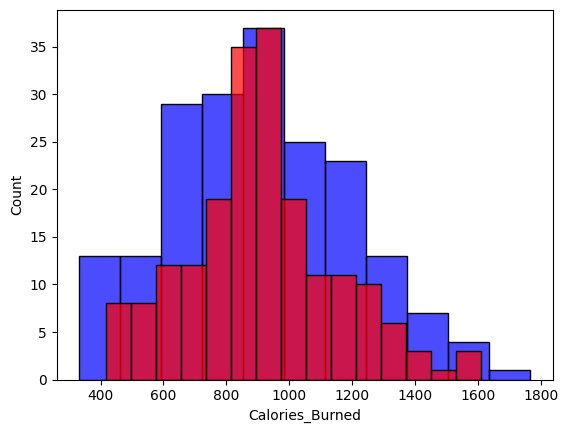

In [316]:
sns.histplot(y_test , color = 'blue' , alpha = 0.7)
sns.histplot(y_test_pred , color = 'red' , alpha = 0.7)

### Observation 
- The model works well for average values but guesses too low for high numbers and too high for low numbers.

# Evaluate the Model

In [327]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  91.97846153846156
Mean Squared Error:  14223.044717948716
Root Mean Squared Error:  119.26040716830006


# Result and Conclusion 

- I worked on the Gym_Tracking dataset to predict calories burned based on all available features.

- I experimented with different k values and found k = 0.5 to perform best as a hyperparameter.

- The model resulted in a Mean Squared Error (MSE) of 14,223.04.

- Based on these results, I believe that KNN is not a suitable model for predicting calories burned in this dataset.